In [1782]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [1783]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [1784]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [1785]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [1786]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [1787]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [1788]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [1789]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [1790]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [1791]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [1792]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [1793]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [1794]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [1795]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [1796]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [1797]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [1798]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [1799]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [1800]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [1801]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [1802]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [1803]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [1804]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [1805]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [1806]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [1807]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [1808]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
import numpy as np
import scipy.stats as stats

In [1809]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full')
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [1810]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full')
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [1811]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [1812]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [1813]:
def analyze_clusters(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))

    for i in range(len(np.unique(labels))):
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        for x in X[labels == i]:
            plt.plot(x, color='#de7100', linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
    plt.tight_layout()
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [1814]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [1815]:
def draw_scores(k, silhouette, separation, density, method, album_type):
    
    fig = plt.subplots(figsize=(20, 5))
    fig_dims = (1, 3)
    
    ax = plt.subplot2grid(fig_dims, (0, 0))
    ax.plot(k, silhouette)
    plt.xlabel('K')
    plt.ylabel('SIL')
    plt.title(album_type + ' Silhouette Score \n' + str(method) + "-linkage")
    
    ax = plt.subplot2grid(fig_dims, (0, 1))
    ax.plot(k, separation)
    plt.xlabel('K')
    plt.ylabel('SEP')
    plt.title(album_type + ' Separation Score \n' + str(method) + "-linkage")
    
    ax = plt.subplot2grid(fig_dims, (0, 2))
    ax.plot(k, density)
    plt.xlabel('K')
    plt.ylabel('VRC')
    plt.title(album_type + ' Variance Ratio Criterion Score \n' + str(method) + "-linkage")
    
    plt.show()

In [1816]:
def interpret_dendrogram(max_k, method, X):
    
    k = list(range(2, max_k+1))
    silhouette = []
    separation = []
    density = []
    
    for i in k:
        complete = AgglomerativeClustering(n_clusters=i, linkage=method, affinity='euclidean', connectivity=None)
        complete.fit(X)
        hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
        
        print('Cluster numbers: ', i)
        print('Cluster', dict(zip(bins, hist)))
        print()
        
        print('Silhouette Score', silhouette_score(X, complete.labels_))
        silhouette.append(silhouette_score(X, complete.labels_))
        
        print('Separation Score', davies_bouldin_score(X, complete.labels_))
        separation.append(davies_bouldin_score(X, complete.labels_))
        
        print('Variance Ratio Criterion Score', calinski_harabasz_score(X, complete.labels_))
        density.append(calinski_harabasz_score(X, complete.labels_))
        
        print()
        print('-------------------------------------------------')
        print()

    draw_scores(k, silhouette, separation, density, method, album_type)

In [1817]:
def plot_dendrogram(model, cut_distance, linkage_mode, album_type, **kwargs):
    """
        Function which creates the linkage matrix (proximity/similarity matrix),
        with which plots the cooresponding obtained dendrogram.
    """
    # children_ = children of each non-leaf node
    # N.B. A node i greater than or equal to n_samples is a non-leaf node 
    # and has children children_[i - n_samples], with n_samples = len(labels_)
    counts = np.zeros(model.children_.shape[0])  
    n_samples = len(model.labels_) # labels_ = cluster labels for each point
    
    # create the counts of samples under each node:
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    # add cut line according to silhouette score
    plt.axhline(y=cut_distance, c='k', linestyle="--")
    
    plt.title(album_type + '\nHierarchical Clustering by ' + str(linkage_mode))
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    plt.show()

In [1818]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [1819]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [1820]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [1821]:
def plot_centroids_approximated(centers, X, album_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " centroids\nApproximated Clustering")
    plt.show()

In [1822]:
def plot_mean_values_approximated(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nApproximated Clustering".format(album_type))
    
    plt.show()

<h2>Datasets Months</h2>

In [1823]:
df_studio = pd.read_csv('df_month_studio.csv', index_col = 0)
df_live = pd.read_csv('df_month_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_month_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [1824]:
album_type = "Studio_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [1825]:
df_studio

January  February  March  April   May  June  July  August  \
track_date_created                                                              
2009_studio             131       145    486   1501  1477   904  1005     353   
2010_studio             949       811    835    754  1180   761   786    1031   
2011_studio            1030       979    855    622   584   664  1145     988   
2012_studio            1103      1194    894    637  1172   992   652     595   
2013_studio            1397       753    954   1946  1122   958   651     695   
2014_studio             789       982    610    658  1150   614   604     815   
2015_studio             737      1051    998    975  1732   948   825     773   
2016_studio            1307      1376   1017    906  1494  1033   917     809   

                    September  October  November  December  
track_date_created                                          
2009_studio               321      555       731       657  
2010_studio               968     1001      1151      1263  
2011_studio               585      741       527       802  
2012_studio               650     1144       806       906  
2013_studio               842      939      1016      1303  
2014_studio               332      803       789      1025  
2015_studio               946      937      1069       932  
2016_studio              1493      941       987      1282

In [1826]:
df_studio.shape

(8, 12)

In [1827]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[ 131.],
        [ 145.],
        [ 486.],
        [1501.],
        [1477.],
        [ 904.],
        [1005.],
        [ 353.],
        [ 321.],
        [ 555.],
        [ 731.],
        [ 657.]],

       [[ 949.],
        [ 811.],
        [ 835.],
        [ 754.],
        [1180.],
        [ 761.],
        [ 786.],
        [1031.],
        [ 968.],
        [1001.],
        [1151.],
        [1263.]],

       [[1030.],
        [ 979.],
        [ 855.],
        [ 622.],
        [ 584.],
        [ 664.],
        [1145.],
        [ 988.],
        [ 585.],
        [ 741.],
        [ 527.],
        [ 802.]],

       [[1103.],
        [1194.],
        [ 894.],
        [ 637.],
        [1172.],
        [ 992.],
        [ 652.],
        [ 595.],
        [ 650.],
        [1144.],
        [ 806.],
        [ 906.]],

       [[1397.],
        [ 753.],
        [ 954.],
        [1946.],
        [1122.],
        [ 958.],
        [ 651.],
        [ 695.],
        [ 842.],
        [ 939.],
      

In [1828]:
tss_studio.shape

(8, 12, 1)

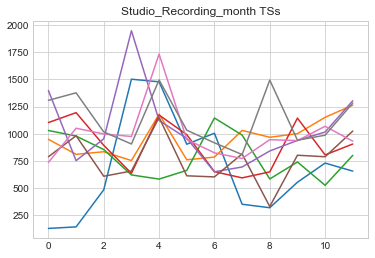

In [1829]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [1830]:
tss_studio_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio)
tss_studio_scaled

array([[[-1.26218114],
        [-1.23050405],
        [-0.45894068],
        [ 1.83764825],
        [ 1.78334467],
        [ 0.48684668],
        [ 0.71537425],
        [-0.75987302],
        [-0.83227779],
        [-0.30281788],
        [ 0.09540837],
        [-0.07202767]],

       [[-0.05097495],
        [-0.87856829],
        [-0.73463901],
        [-1.22040032],
        [ 1.33434433],
        [-1.17842095],
        [-1.02849462],
        [ 0.44078341],
        [ 0.06296906],
        [ 0.26087181],
        [ 1.16042979],
        [ 1.83209974]],

       [[ 1.20413941],
        [ 0.94447298],
        [ 0.31312716],
        [-0.873192  ],
        [-1.06666895],
        [-0.65934906],
        [ 1.78966174],
        [ 0.99029647],
        [-1.06157745],
        [-0.26730367],
        [-1.35688437],
        [ 0.04327774]],

       [[ 0.95710085],
        [ 1.37667296],
        [-0.0065318 ],
        [-1.19147722],
        [ 1.27523795],
        [ 0.44531509],
        [-1.12231698],
     

In [1831]:
tss_studio_scaled.shape

(8, 12, 1)

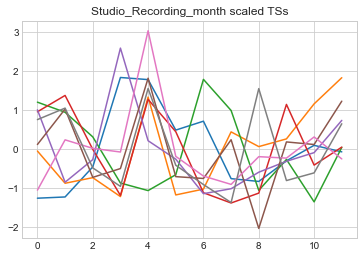

In [1832]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [1833]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  
track_date_created                      
2009_studio         0.095408 -0.072028  
2010_studio         1.160430  1.832100  
2011_studio        -1.356884  0.043278  
2012_studio        -0.412272  0.048796  
2013_studio        -0.092369  0.736064  
2014_studio         0.116706  1.229542  
2015_studio         0.310298 -0.253381  
2016_studio        -0.612254  0.649317

<h3>Euclidean Distance</h3>

k:  2 SSE:  6.763915433714714 Silhouette Score:  0.157716114278583

k:  3 SSE:  4.359816845966403 Silhouette Score:  0.18156769902827263

k:  4 SSE:  3.605099046323118 Silhouette Score:  0.06290798348287757

k:  5 SSE:  2.211836020840879 Silhouette Score:  0.08557886604195425

k:  6 SSE:  1.2662765057028882 Silhouette Score:  0.044902235550146545

k:  7 SSE:  0.603087455221099 Silhouette Score:  0.021959203796989457



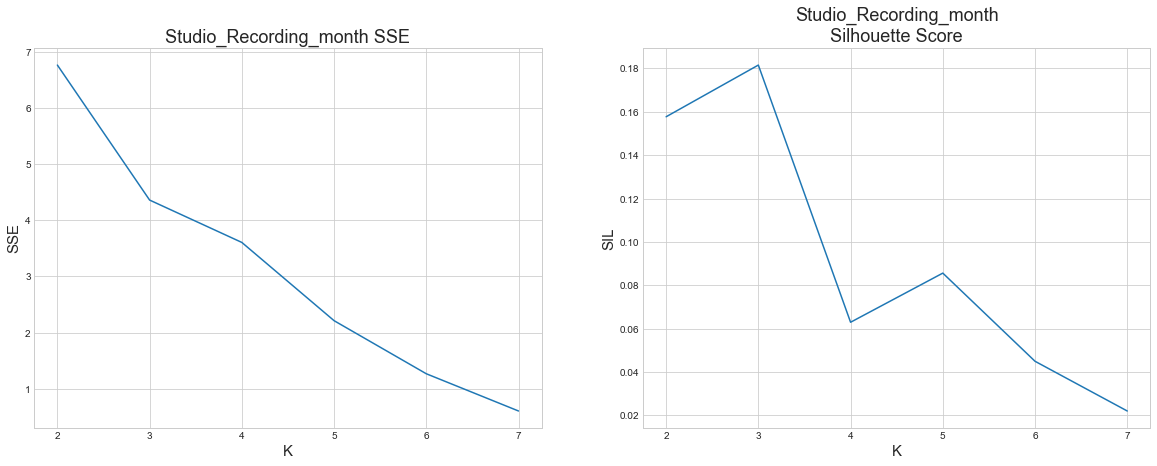

In [1834]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [1835]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(3, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  4.359816845966403
Silhouette Score:  0.18156769902827263


In [1836]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       1  
2010_studio         1.160430  1.832100       0  
2011_studio        -1.356884  0.043278       2  
2012_studio        -0.412272  0.048796       0  
2013_studio        -0.092369  0.736064       1  
2014_studio         0.116706  1.229542       0  
2015_studio         0.310298 -0.253381       0  
2016_studio        -0.612254  0.649317       0

Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2015_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio']

Cluster 2
 ['2011_studio']



**Centroids**

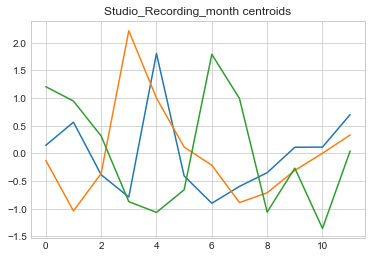

In [1837]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

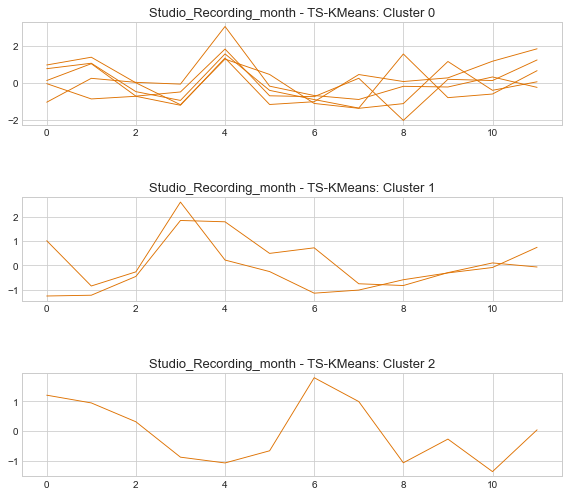

In [1838]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, album_type, 'TS-KMeans', False)

<h3>DTW distance</h3>

k:  2 SSE:  2.452954365841615 Silhouette Score:  0.2792373019131862

k:  3 SSE:  1.6008000734971273 Silhouette Score:  0.20566602040719612

k:  4 SSE:  1.0131548767147136 Silhouette Score:  0.22841775888885985

k:  5 SSE:  0.66641723624507 Silhouette Score:  0.18765038455343405

k:  6 SSE:  0.3985476538323235 Silhouette Score:  0.12915511843662325

k:  7 SSE:  0.1271078169398682 Silhouette Score:  0.07885133670774801



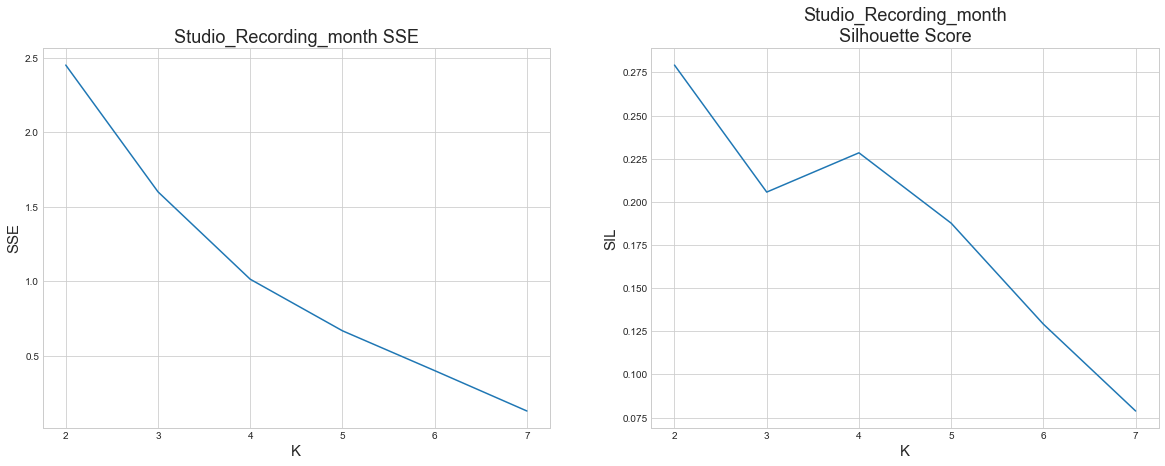

In [1839]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [1840]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(4, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 12, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  1.0830659354672627
Silhouette Score:  0.22841775888885985


In [1841]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       2  
2010_studio         1.160430  1.832100       1  
2011_studio        -1.356884  0.043278       0  
2012_studio        -0.412272  0.048796       3  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       2  
2016_studio        -0.612254  0.649317       3

Cluster 0
 ['2011_studio', '2013_studio']

Cluster 1
 ['2010_studio', '2014_studio']

Cluster 2
 ['2009_studio', '2015_studio']

Cluster 3
 ['2012_studio', '2016_studio']



**Centroids**

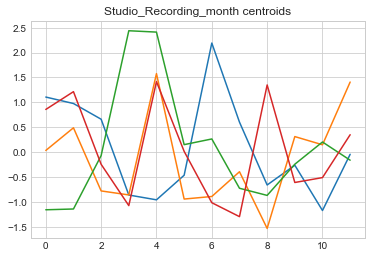

In [1842]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

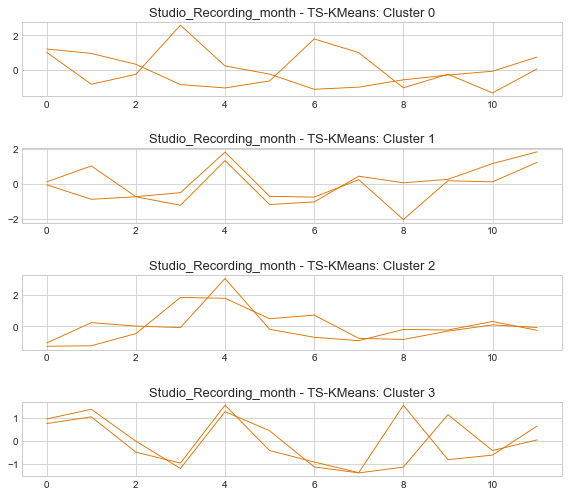

In [1843]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, album_type, 'TS-KMeans', False)

<h3>KMeans sklearn</h3>

k:  2 SSE:  54.11132346971772 Silhouette Score:  0.1577161142785831
Calinski-Harabaz:  2.1895681295913336 Davies-Bouldin:  1.2576346361634212

k:  3 SSE:  34.878534767731225 Silhouette Score:  0.18156769902827263
Calinski-Harabaz:  2.7939481389806677 Davies-Bouldin:  0.9211512929035979

k:  4 SSE:  24.963717865749473 Silhouette Score:  0.11859090239906644
Calinski-Harabaz:  2.6114883521114973 Davies-Bouldin:  1.0012564850513055

k:  5 SSE:  18.82628106474441 Silhouette Score:  0.04511539941504408
Calinski-Harabaz:  2.1923520278221766 Davies-Bouldin:  0.7491598683149431

k:  6 SSE:  10.130212045623104 Silhouette Score:  0.04490223555014655
Calinski-Harabaz:  2.51634810236821 Davies-Bouldin:  0.5600760633507119

k:  7 SSE:  4.824699641768792 Silhouette Score:  0.02195920379698945
Calinski-Harabaz:  2.3847205412951555 Davies-Bouldin:  0.40608363352297877



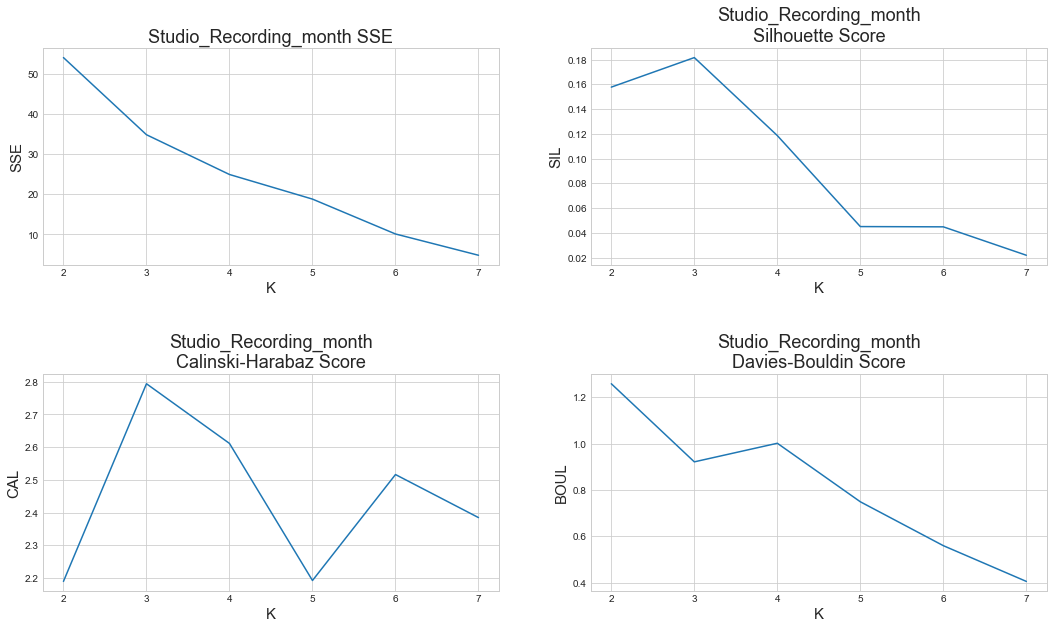

In [1844]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [1845]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(3, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (3, 12)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  37.322189352854785
Silhouette Score:  0.12192217840901814
Calinski - Harabaz Score:  2.4473291204413155
Davies - Bouldin Score:  1.1350284300526432


In [1846]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       0  
2010_studio         1.160430  1.832100       1  
2011_studio        -1.356884  0.043278       2  
2012_studio        -0.412272  0.048796       1  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       0  
2016_studio        -0.612254  0.649317       1

Cluster 0
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 1
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 2
 ['2011_studio']



<h3>DBSCAN</h3>

In [1847]:
dist = pdist(df_tss_studio_scaled, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[4.93508933 5.88114139 5.25282562 3.63278036 4.52934966 3.2574568
 5.28683756 5.61032604 4.52550254 4.86309235 3.25889163 3.91475312
 4.04299502 4.91664641 5.68920024 4.74524562 6.06543766 5.359166
 4.91005636 3.10634822 3.72916615 3.56586425 4.60752827 4.70658615
 4.84482785 3.4082873  4.265855   3.54159341]

[[0.         4.93508933 5.88114139 5.25282562 3.63278036 4.52934966
  3.2574568  5.28683756]
 [4.93508933 0.         5.61032604 4.52550254 4.86309235 3.25889163
  3.91475312 4.04299502]
 [5.88114139 5.61032604 0.         4.91664641 5.68920024 4.74524562
  6.06543766 5.359166  ]
 [5.25282562 4.52550254 4.91664641 0.         4.91005636 3.10634822
  3.72916615 3.56586425]
 [3.63278036 4.86309235 5.68920024 4.91005636 0.         4.60752827
  4.70658615 4.84482785]
 [4.52934966 3.25889163 4.74524562 3.10634822 4.60752827 0.
  3.4082873  4.265855  ]
 [3.2574568  3.91475312 6.06543766 3.72916615 4.70658615 3.4082873
  0.         3.54159341]
 [5.28683756 4.04299502 5.359166   3.56586425 

In [1848]:
k = 2
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

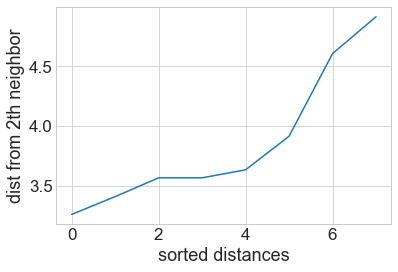

In [1849]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [1850]:
eps_to_test = [3.5, 3.6, 3.7, 3.8, 3.9, 4.0]
min_samples_to_test = [2, 3, 4, 5]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [3.5, 3.6, 3.7, 3.8, 3.9, 4.0]
min_samples: [2, 3, 4, 5]


In [1851]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [1852]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_studio_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 3.5 and min_samples =   2 | 4.616    1
  2 | Tested with eps = 3.5 and min_samples =   3 | 4.616    1
  3 | Tested with eps = 3.5 and min_samples =   4 | 4.542    1
  4 | Tested with eps = 3.5 and min_samples =   5 | 4.193    0
  5 | Tested with eps = 3.6 and min_samples =   2 | 4.898    1
  6 | Tested with eps = 3.6 and min_samples =   3 | 4.898    1
  7 | Tested with eps = 3.6 and min_samples =   4 | 4.898    1
  8 | Tested with eps = 3.6 and min_samples =   5 | 4.193    0
  9 | Tested with eps = 3.7 and min_samples =   2 | 5.264    1
 10 | Tested with eps = 3.7 and min_samples =   3 | 5.264    1
 11 | Tested with eps = 3.7 and min_samples =   4 | 4.898    1
 12 | Tested with eps = 3.7 and min_samples =   5 | 4.193    0
 13 | Tested with eps = 3.8 and min_samples =   2 | 5.264    1
 14 | Tested with eps = 3.8 and min_samples =   3

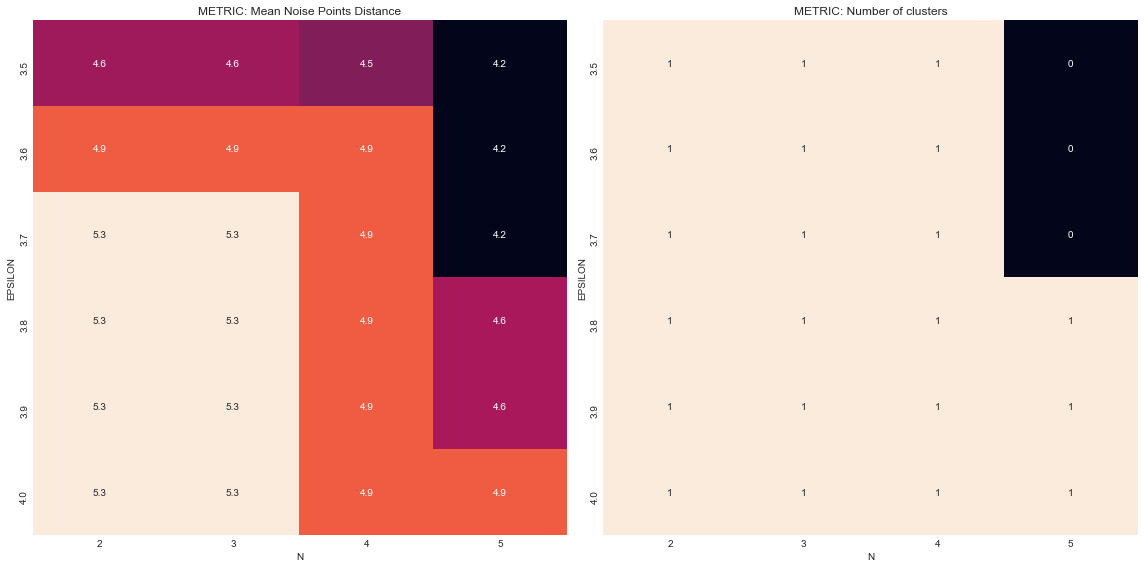

In [1853]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [1854]:
best_dbscan_model = DBSCAN(eps = 3.8, min_samples = 3)

# Fitting
best_dbscan_model.fit(df_tss_studio_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=3.8, min_samples=3)

In [1855]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0]), array([1, 7]))

In [1856]:
cluster_insight(df_tss_studio_scaled, best_dbscan_model.labels_)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       0  
2010_studio         1.160430  1.832100       0  
2011_studio        -1.356884  0.043278      -1  
2012_studio        -0.412272  0.048796       0  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       0  
2015_studio         0.310298 -0.253381       0  
2016_studio        -0.612254  0.649317       0

Cluster -1
 ['2011_studio']

Cluster 0
 ['2009_studio', '2010_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2016_studio']



<h3>Hierarchical Clustering</h3>

**Single**

In [1857]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_studio_scaled.values)

In [1858]:
model_single.n_clusters_

8

In [1859]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.19908669698640416
Separation Score 0.5840552157459542
Variance Ratio Criterion Score 2.158258228942185

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 6, 1: 1, 2: 1}

Silhouette Score 0.08615939302993751
Separation Score 0.6419316659924476
Variance Ratio Criterion Score 1.888930228815168

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 5, 1: 1, 2: 1, 3: 1}

Silhouette Score -0.0261341603146841
Separation Score 0.6775830659089936
Variance Ratio Criterion Score 1.6567809489952807

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 3, 1: 2, 2: 1, 3: 1, 4: 1}

Silhouette Score 0.04417571894240195
Separation Score 0.7458256282094498
Variance Ratio Criterion Score 2.1826089425257127

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0449022355501

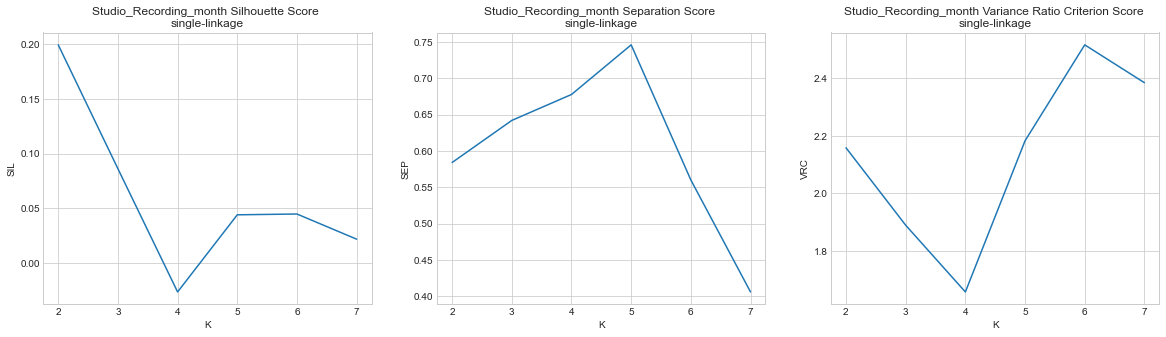

In [1860]:
interpret_dendrogram(7, 'single', df_tss_studio_scaled.values)

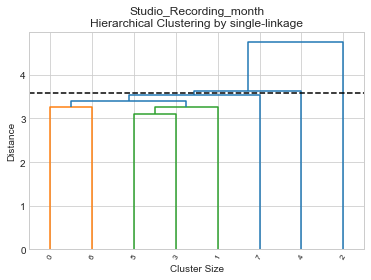

In [1861]:
cut_distance = 3.58
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

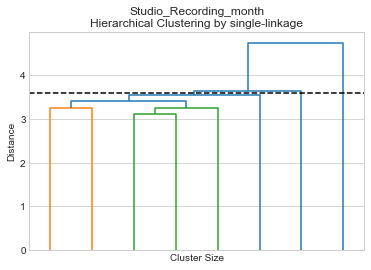

In [1862]:
cut_distance = 3.59
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [1863]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_studio_scaled.values)

In [1864]:
model_complete.n_clusters_

8

In [1865]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.19908669698640416
Separation Score 0.5840552157459542
Variance Ratio Criterion Score 2.158258228942185

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 1, 2: 4}

Silhouette Score 0.12192217840901814
Separation Score 1.1350284300526432
Variance Ratio Criterion Score 2.4473291204413155

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 1, 2: 2, 3: 1}

Silhouette Score 0.08735049016343562
Separation Score 0.8618367850747841
Variance Ratio Criterion Score 2.2728837685598218

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.0660424636592773
Separation Score 0.8475387902301854
Variance Ratio Criterion Score 2.2764543504686

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0449022355501465

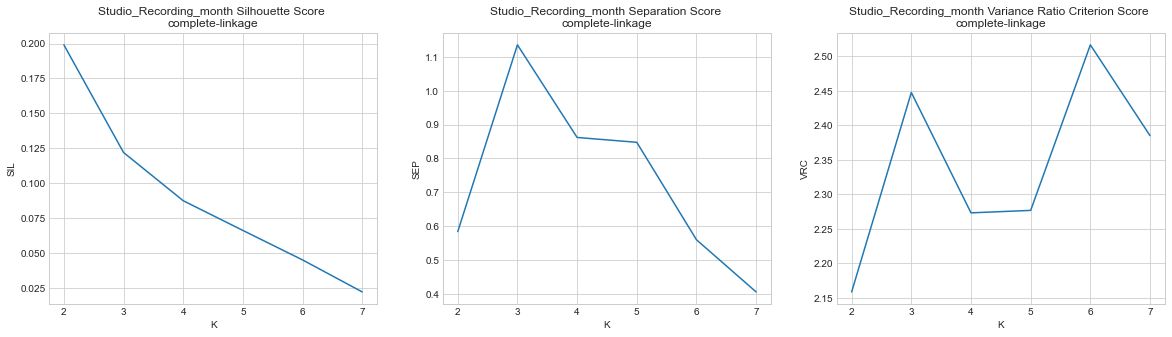

In [1866]:
interpret_dendrogram(7, 'complete', df_tss_studio_scaled.values)

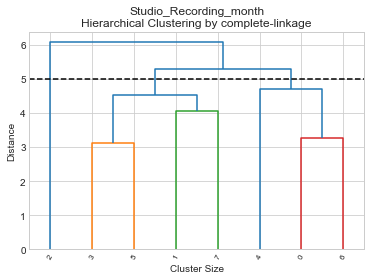

In [1867]:
cut_distance = 5
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

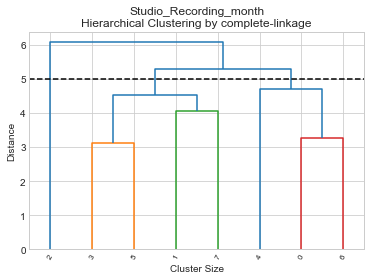

In [1868]:
cut_distance = 5
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [1869]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                            linkage='average').fit(df_tss_studio_scaled.values)

In [1870]:
model_average.n_clusters_

8

In [1871]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.19908669698640416
Separation Score 0.5840552157459542
Variance Ratio Criterion Score 2.158258228942185

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 1, 2: 4}

Silhouette Score 0.12192217840901814
Separation Score 1.1350284300526432
Variance Ratio Criterion Score 2.4473291204413155

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 1, 2: 2, 3: 1}

Silhouette Score 0.08735049016343562
Separation Score 0.8618367850747841
Variance Ratio Criterion Score 2.2728837685598218

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 3, 1: 1, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.04417571894240195
Separation Score 0.7458256282094498
Variance Ratio Criterion Score 2.1826089425257127

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.044902235550

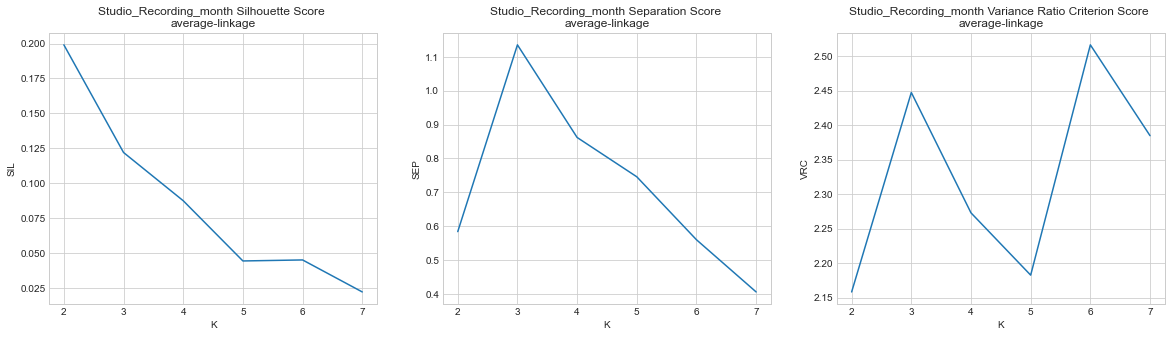

In [1872]:
interpret_dendrogram(7, 'average', df_tss_studio_scaled.values)

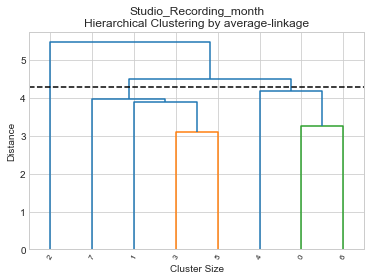

In [1873]:
cut_distance = 4.3
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

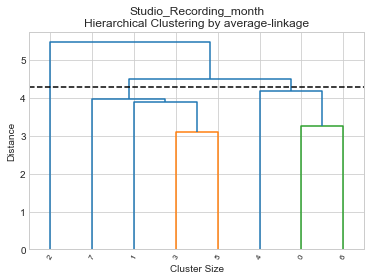

In [1874]:
cut_distance = 4.3
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [1875]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                        linkage='ward').fit(df_tss_studio_scaled.values)

In [1876]:
model_ward.n_clusters_

8

In [1877]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 5, 1: 3}

Silhouette Score 0.12104421963980222
Separation Score 1.5373680796905143
Variance Ratio Criterion Score 2.161233002736516

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 4, 2: 1}

Silhouette Score 0.12192217840901814
Separation Score 1.1350284300526432
Variance Ratio Criterion Score 2.4473291204413155

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 2, 2: 1, 3: 1}

Silhouette Score 0.08735049016343562
Separation Score 0.8618367850747841
Variance Ratio Criterion Score 2.2728837685598213

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 2}

Silhouette Score 0.0660424636592773
Separation Score 0.8475387902301854
Variance Ratio Criterion Score 2.2764543504686

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0449022355501465

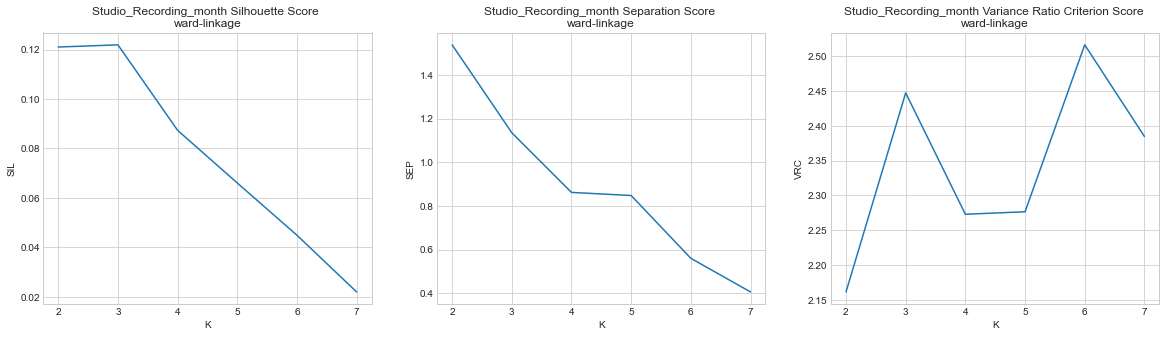

In [1878]:
interpret_dendrogram(7, 'ward', df_tss_studio_scaled.values)

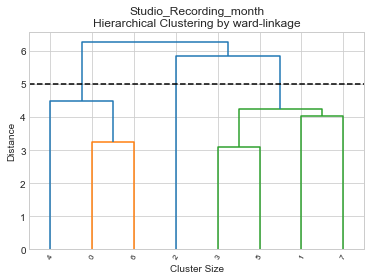

In [1879]:
cut_distance = 5
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

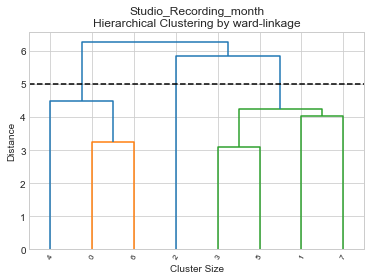

In [1880]:
cut_distance = 5
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [1881]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  6.517069556225921 Silhouette Score:  0.6509977734702348
Calinski-Harabaz:  22.723419077575475 Davies-Bouldin:  0.14633834762401604

k:  3 SSE:  1.4199837411650793 Silhouette Score:  0.5351613666005417
Calinski-Harabaz:  52.428011554671265 Davies-Bouldin:  0.14309303793911696

k:  4 SSE:  0.4981741699294301 Silhouette Score:  0.34695847914479216
Calinski-Harabaz:  82.16826167786218 Davies-Bouldin:  0.4239607745195646

k:  5 SSE:  0.1821071118507948 Silhouette Score:  0.2693343405115574
Calinski-Harabaz:  127.74067103881 Davies-Bouldin:  0.1612471232762883

k:  6 SSE:  0.042764944823801374 Silhouette Score:  0.19502816445845017
Calinski-Harabaz:  291.4161448860354 Davies-Bouldin:  0.1443423480444526

k:  7 SSE:  0.012324282022324 Silhouette Score:  0.05860787988135706
Calinski-Harabaz:  421.74774695936884 Davies-Bouldin:  0.16706607194721634



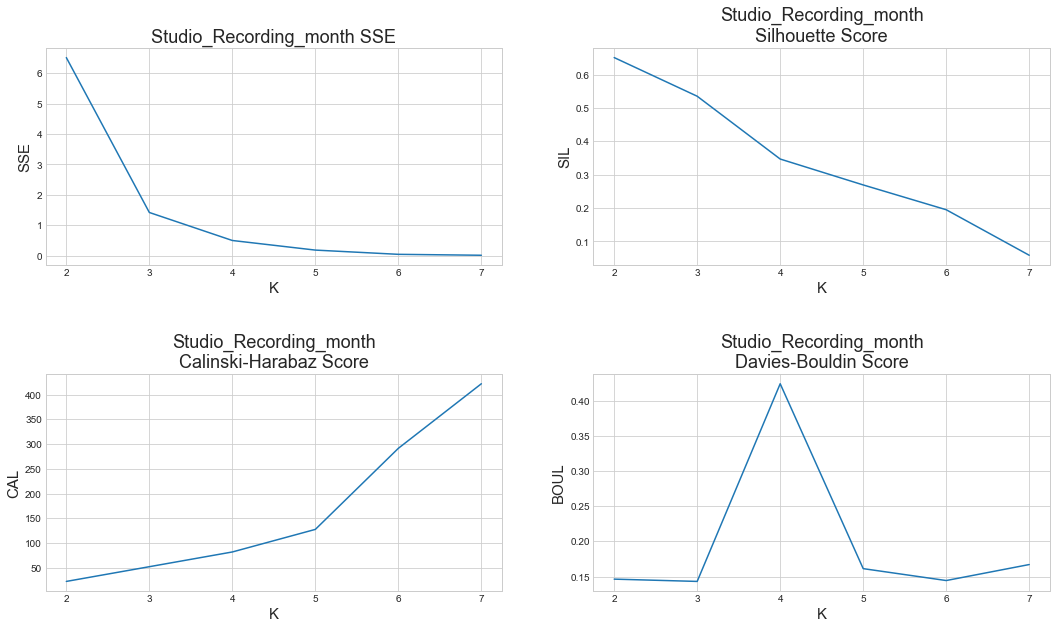

In [1882]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [1883]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 6, 1: 1, 2: 1}

SSE:  1.4199837411650793
Silhouette Score:  0.5351613666005417
Calinski - Harabaz Score:  52.428011554671265
Davies - Bouldin Score:  0.14309303793911696


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

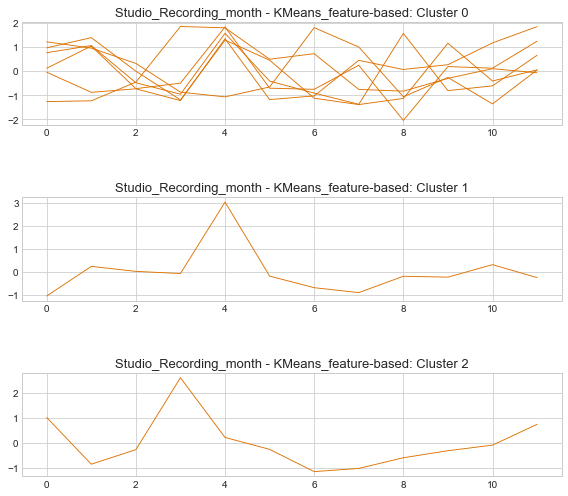

In [1884]:
analyze_clusters(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

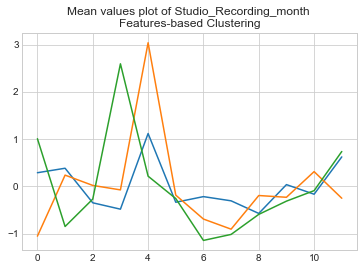

In [1885]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [1886]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [1887]:
print(tss_studio_scaled.shape, M.shape)

(8, 12, 1) (8, 8)


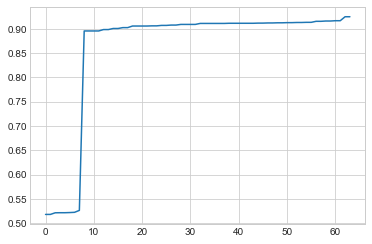

In [1888]:
plt.plot(sorted(M.ravel()))
plt.show()

In [1889]:
dbscan_compression_studio = DBSCAN(eps=0.90, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.9, metric='precomputed')

In [1890]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [1891]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)

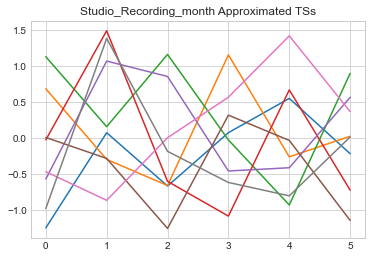

In [1892]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  1.8333894193762004 Silhouette Score:  0.3025371607589762

k:  3 SSE:  1.12807646185304 Silhouette Score:  0.19907458695342228

k:  4 SSE:  0.6681571628355313 Silhouette Score:  0.26970576386545825

k:  5 SSE:  0.355313505203969 Silhouette Score:  0.27725629074898733

k:  6 SSE:  0.1490385087036879 Silhouette Score:  0.2327888307523237

k:  7 SSE:  0.022082994804375956 Silhouette Score:  0.16465671617338806



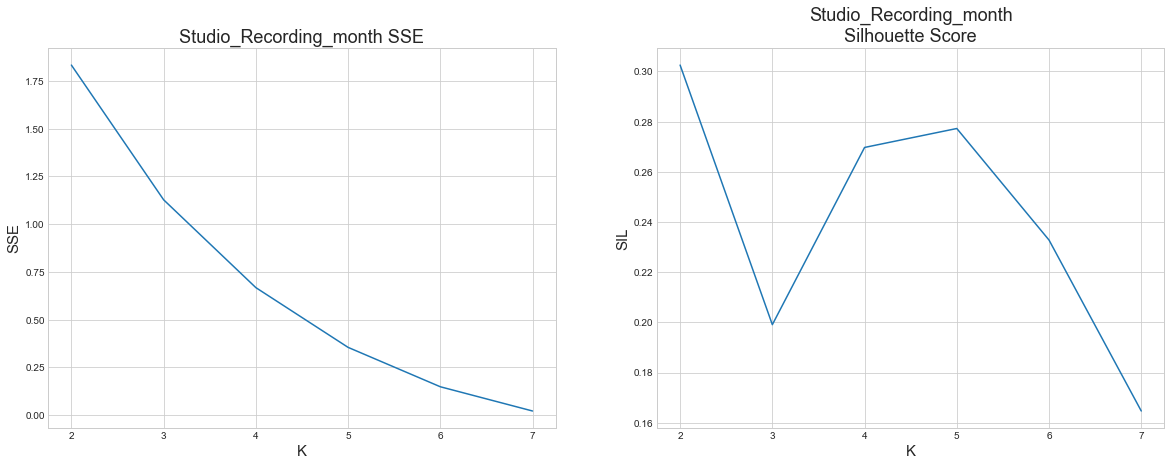

In [1893]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [1894]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(5, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (5, 6, 1)

Labels:  {0: 2, 1: 1, 2: 2, 3: 2, 4: 1}

SSE:  0.355313505203969
Silhouette Score:  0.27725629074898733


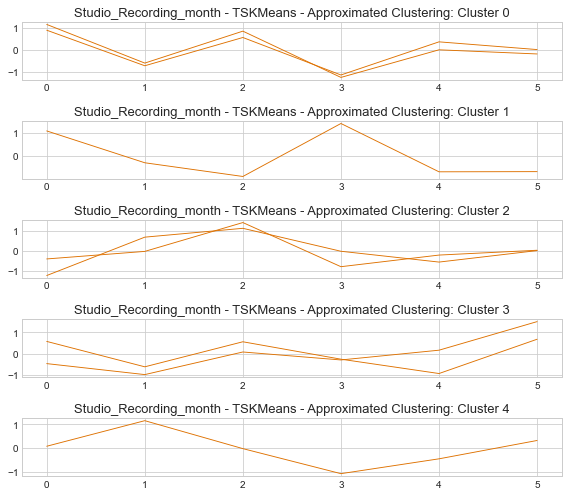

In [1895]:
analyze_clusters(labels_studio_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', False)

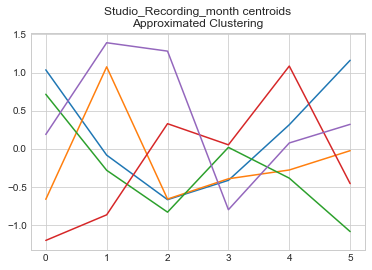

In [1896]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type)

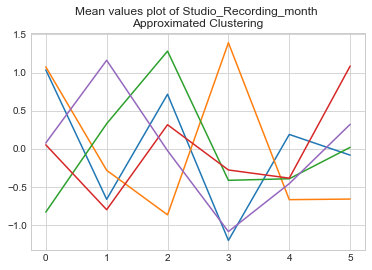

In [1897]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [1898]:
album_type = "Live_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [1899]:
df_live

January  February  March  April  May  June  July  August  \
track_date_created                                                             
2009_live               275       205    327    385  186   243   225     148   
2010_live               162       148     28     95   64   150   202     103   
2011_live                77       100     62    144  111   263   133     154   
2012_live                31       214    181    114  268   123   121     115   
2013_live                41        92    129     60   58    94   147      73   
2014_live               110       109     37     35   61    17    27       7   
2015_live                62        65     20     54   38    22    30     116   
2016_live                59        91     49     28   50    91    13      55   

                    September  October  November  December  
track_date_created                                          
2009_live                 111      170       120       188  
2010_live                 109       94        68        61  
2011_live                 218      121       192       151  
2012_live                  46      101        39        68  
2013_live                  39       51        39        89  
2014_live                  27       35        11        19  
2015_live                  53        1        31        89  
2016_live                  19       30        59        83

In [1900]:
df_live.shape

(8, 12)

In [1901]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[275.],
        [205.],
        [327.],
        [385.],
        [186.],
        [243.],
        [225.],
        [148.],
        [111.],
        [170.],
        [120.],
        [188.]],

       [[162.],
        [148.],
        [ 28.],
        [ 95.],
        [ 64.],
        [150.],
        [202.],
        [103.],
        [109.],
        [ 94.],
        [ 68.],
        [ 61.]],

       [[ 77.],
        [100.],
        [ 62.],
        [144.],
        [111.],
        [263.],
        [133.],
        [154.],
        [218.],
        [121.],
        [192.],
        [151.]],

       [[ 31.],
        [214.],
        [181.],
        [114.],
        [268.],
        [123.],
        [121.],
        [115.],
        [ 46.],
        [101.],
        [ 39.],
        [ 68.]],

       [[ 41.],
        [ 92.],
        [129.],
        [ 60.],
        [ 58.],
        [ 94.],
        [147.],
        [ 73.],
        [ 39.],
        [ 51.],
        [ 39.],
        [ 89.]],

       [[110.],
        [109.]

In [1902]:
tss_live.shape

(8, 12, 1)

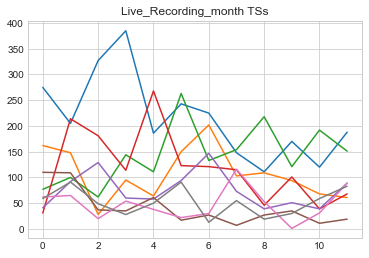

In [1903]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [1904]:
tss_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_live)
tss_live_scaled

array([[[ 0.76111948],
        [-0.13056861],
        [ 1.42351635],
        [ 2.16234362],
        [-0.37259824],
        [ 0.35349064],
        [ 0.12419941],
        [-0.85665749],
        [-1.32797834],
        [-0.57641266],
        [-1.21333273],
        [-0.34712144]],

       [[ 1.14599914],
        [ 0.85429027],
        [-1.6460715 ],
        [-0.25003618],
        [-0.89596297],
        [ 0.89596297],
        [ 1.97945307],
        [-0.08334539],
        [ 0.0416727 ],
        [-0.27087252],
        [-0.81261757],
        [-0.95847201]],

       [[-1.20396537],
        [-0.78963314],
        [-1.47418203],
        [ 0.00300241],
        [-0.59147426],
        [ 2.14672129],
        [-0.19515648],
        [ 0.18314685],
        [ 1.33607129],
        [-0.41132981],
        [ 0.86769574],
        [ 0.12910352]],

       [[-1.26257407],
        [ 1.38052665],
        [ 0.90390193],
        [-0.06379068],
        [ 2.16045801],
        [ 0.06619788],
        [ 0.03731153],
     

In [1905]:
tss_live_scaled.shape

(8, 12, 1)

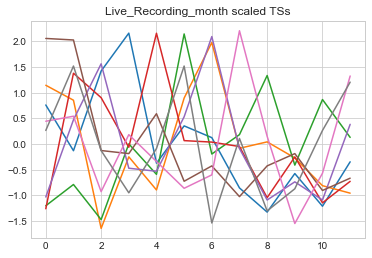

In [1906]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [1907]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  
track_date_created                      
2009_live          -1.213333 -0.347121  
2010_live          -0.812618 -0.958472  
2011_live           0.867696  0.129104  
2012_live          -1.147029 -0.728177  
2013_live          -1.092020  0.383683  
2014_live          -0.905908 -0.666329  
2015_live          -0.569309  1.326572  
2016_live           0.264888  1.206714

<h3>Euclidean Distance</h3>

k:  2 SSE:  7.576410329087443 Silhouette Score:  0.12055926099431188

k:  3 SSE:  5.711004933918124 Silhouette Score:  0.11059446248585553

k:  4 SSE:  4.16162166495768 Silhouette Score:  0.10609282254606618

k:  5 SSE:  3.0168411103481696 Silhouette Score:  0.06877936450062136

k:  6 SSE:  1.93898629458928 Silhouette Score:  0.03832610439980337

k:  7 SSE:  0.9161073761069961 Silhouette Score:  0.013981768177269665



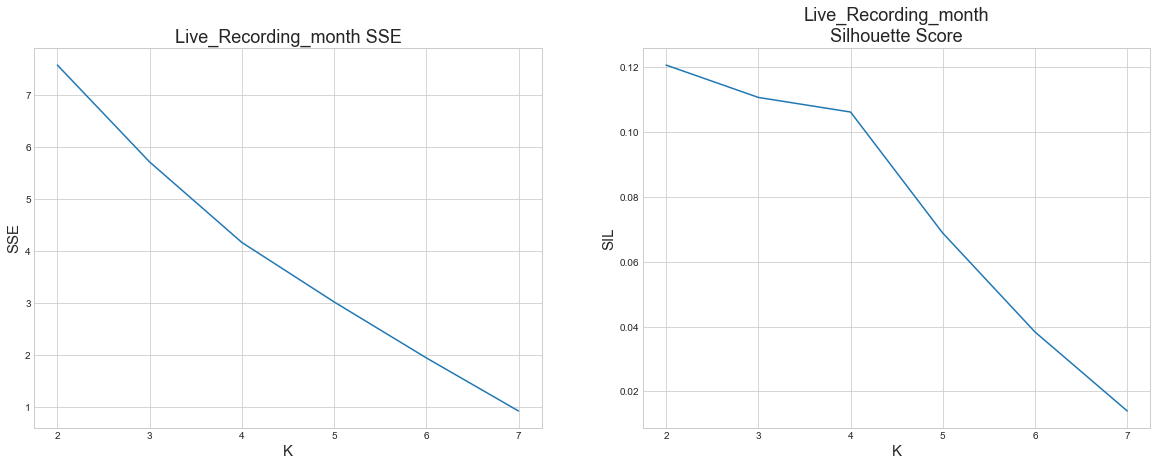

In [1908]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 4**

In [1909]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(4, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (4, 12, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 1}

SSE:  4.16162166495768
Silhouette Score:  0.10609282254606618


In [1910]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       2  
2010_live          -0.812618 -0.958472       1  
2011_live           0.867696  0.129104       3  
2012_live          -1.147029 -0.728177       2  
2013_live          -1.092020  0.383683       2  
2014_live          -0.905908 -0.666329       1  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       0

Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2010_live', '2014_live']

Cluster 2
 ['2009_live', '2012_live', '2013_live']

Cluster 3
 ['2011_live']



**Centroids**

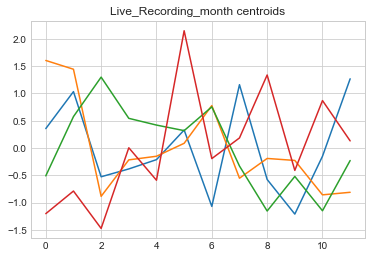

In [1911]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

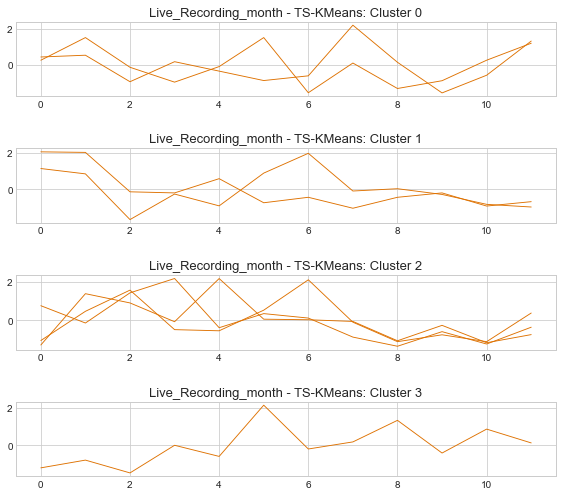

In [1912]:
analyze_clusters(labels_live_eu, tss_live_scaled, album_type, 'TS-KMeans', False)

<h3>DTW distance</h3>

k:  2 SSE:  2.9897725466027296 Silhouette Score:  0.18345719522578402

k:  3 SSE:  2.1868968453424045 Silhouette Score:  0.1864653695998507

k:  4 SSE:  1.5956835754508139 Silhouette Score:  0.15988155108383106

k:  5 SSE:  1.0470027877726724 Silhouette Score:  0.11334263339862123

k:  6 SSE:  0.5007982009391345 Silhouette Score:  0.10290879814272229

k:  7 SSE:  0.22292418850100604 Silhouette Score:  0.03721932964366686



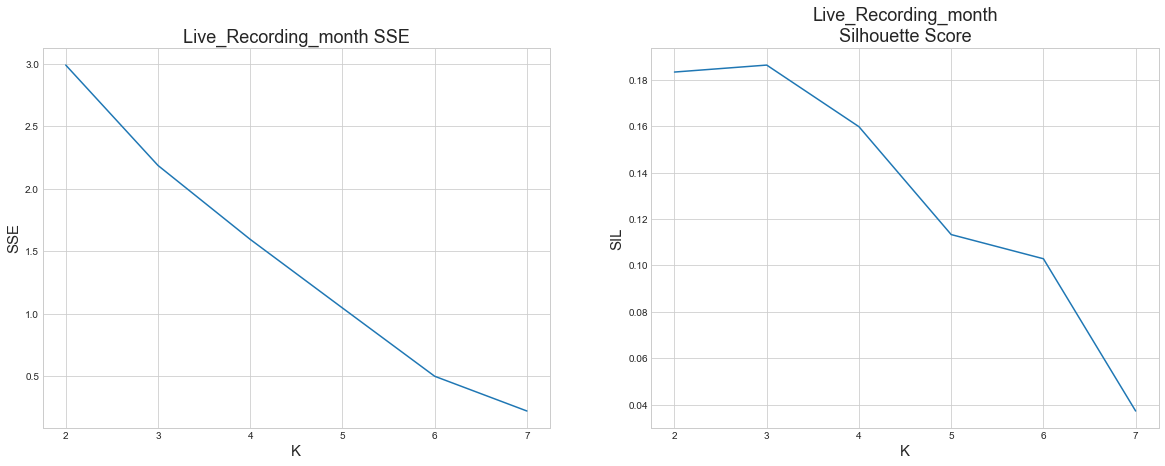

In [1913]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [1914]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(3, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  2.1868968453424045
Silhouette Score:  0.1864653695998507


In [1915]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       2  
2010_live          -0.812618 -0.958472       2  
2011_live           0.867696  0.129104       1  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       2  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       0

Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2011_live', '2012_live', '2013_live']

Cluster 2
 ['2009_live', '2010_live', '2014_live']



**Centroids**

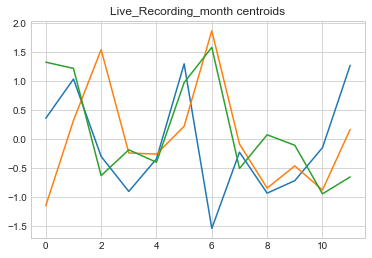

In [1916]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

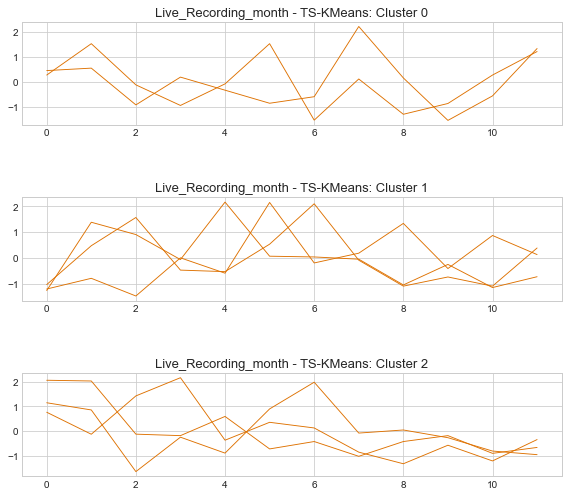

In [1917]:
analyze_clusters(labels_live_dtw, tss_live_scaled, album_type, 'TS-KMeans', False)

<h3>KMeans sklearn</h3>

k:  2 SSE:  60.611282632699535 Silhouette Score:  0.12055926099431191
Calinski-Harabaz:  2.11185479558663 Davies-Bouldin:  1.6161092286481153

k:  3 SSE:  45.68803947134499 Silhouette Score:  0.11059446248585549
Calinski-Harabaz:  1.9839408863878725 Davies-Bouldin:  1.283488289836045

k:  4 SSE:  33.29297331966144 Silhouette Score:  0.10609282254606615
Calinski-Harabaz:  1.9484397301093932 Davies-Bouldin:  1.0227284038211921

k:  5 SSE:  24.13472888278536 Silhouette Score:  0.06877936450062133
Calinski-Harabaz:  1.7964856373496236 Davies-Bouldin:  0.8379601537636902

k:  6 SSE:  15.51189035671424 Silhouette Score:  0.03832610439980336
Calinski-Harabaz:  1.7130883573146778 Davies-Bouldin:  0.6490939545719151

k:  7 SSE:  7.32885900885597 Silhouette Score:  0.013981768177269704
Calinski-Harabaz:  1.6968564088618001 Davies-Bouldin:  0.4467200061252031



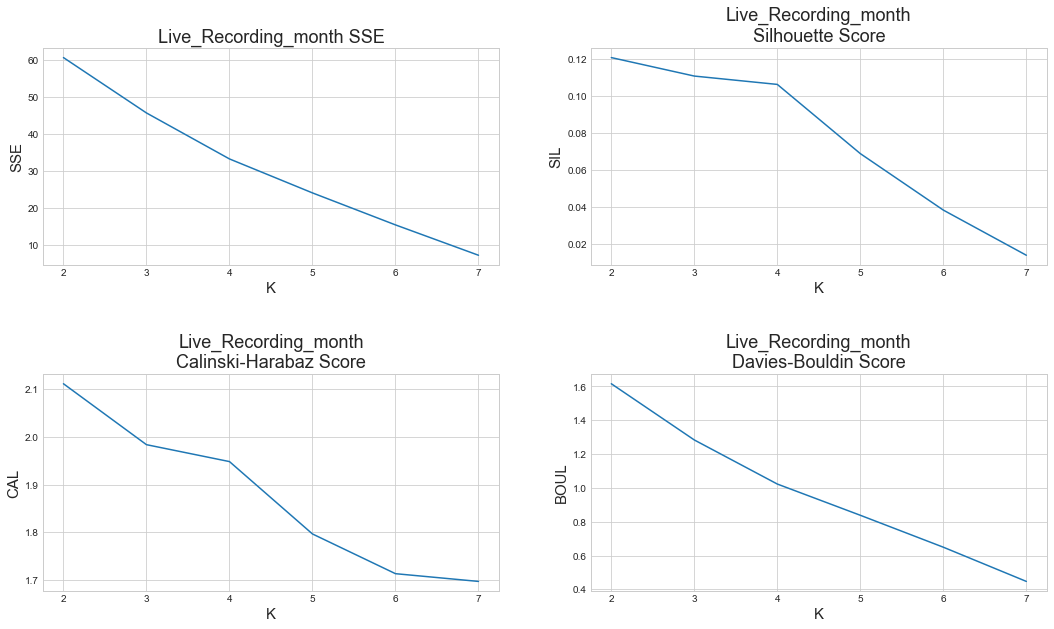

In [1918]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [1919]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(4, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (4, 12)

Labels:  {0: 2, 1: 3, 2: 2, 3: 1}

SSE:  33.29297331966144
Silhouette Score:  0.10609282254606615
Calinski - Harabaz Score:  1.9484397301093932
Davies - Bouldin Score:  1.0227284038211921


In [1920]:
cluster_insight(df_tss_live_scaled, labels_live_2)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       1  
2010_live          -0.812618 -0.958472       2  
2011_live           0.867696  0.129104       3  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       2  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       0

Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2009_live', '2012_live', '2013_live']

Cluster 2
 ['2010_live', '2014_live']

Cluster 3
 ['2011_live']



<h3>DBSCAN</h3>

In [1921]:
dist = pdist(df_tss_live_scaled, 'euclidean') #pair wise distance
#print (dist)
dist = squareform(dist) #distance matrix given the vector dist
#print()
#print(dist)

In [1922]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

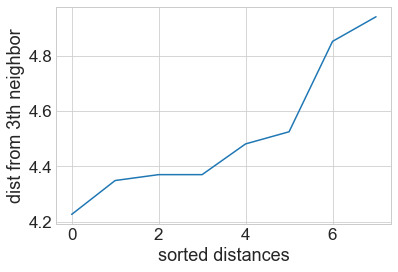

In [1923]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [1924]:
eps_to_test = [4.39, 4.40, 4.45, 4.50, 4.60]
min_samples_to_test = [2, 3, 4, 5]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [4.39, 4.4, 4.45, 4.5, 4.6]
min_samples: [2, 3, 4, 5]


In [1925]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [1926]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_live_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 4.39 and min_samples =   2 | 5.041    1
  2 | Tested with eps = 4.39 and min_samples =   3 | 5.041    1
  3 | Tested with eps = 4.39 and min_samples =   4 | 4.914    1
  4 | Tested with eps = 4.39 and min_samples =   5 | 4.749    1
  5 | Tested with eps = 4.4 and min_samples =   2 | 5.041    1
  6 | Tested with eps = 4.4 and min_samples =   3 | 5.041    1
  7 | Tested with eps = 4.4 and min_samples =   4 | 4.914    1
  8 | Tested with eps = 4.4 and min_samples =   5 | 4.749    1
  9 | Tested with eps = 4.45 and min_samples =   2 | 5.041    1
 10 | Tested with eps = 4.45 and min_samples =   3 | 5.041    1
 11 | Tested with eps = 4.45 and min_samples =   4 | 4.914    1
 12 | Tested with eps = 4.45 and min_samples =   5 | 4.749    1
 13 | Tested with eps = 4.5 and min_samples =   2 | 5.041    1
 14 | Tested with eps = 4.5 and min_sampl

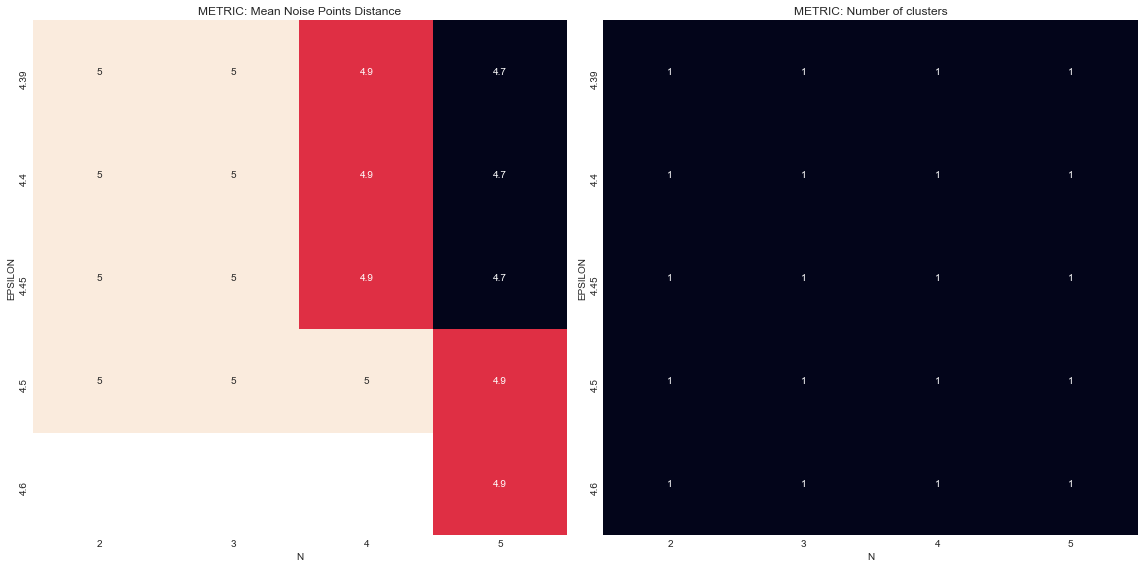

In [1927]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [1928]:
best_dbscan_model = DBSCAN(eps = 4.45, min_samples = 4)

# Fitting
best_dbscan_model.fit(df_tss_live_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=4.45, min_samples=4)

In [1929]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0]), array([2, 6]))

In [1930]:
cluster_insight(df_tss_live_scaled, best_dbscan_model.labels_)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       0  
2010_live          -0.812618 -0.958472       0  
2011_live           0.867696  0.129104      -1  
2012_live          -1.147029 -0.728177       0  
2013_live          -1.092020  0.383683       0  
2014_live          -0.905908 -0.666329       0  
2015_live          -0.569309  1.326572      -1  
2016_live           0.264888  1.206714       0

Cluster -1
 ['2011_live', '2015_live']

Cluster 0
 ['2009_live', '2010_live', '2012_live', '2013_live', '2014_live', '2016_live']



<h3>Hierarchical Clustering</h3>

**Single**

In [1931]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_live_scaled.values)

In [1932]:
model_single.n_clusters_

8

In [1933]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.10102329948039264
Separation Score 0.6929244322601008
Variance Ratio Criterion Score 1.5567019302422238

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 2, 1: 1, 2: 5}

Silhouette Score 0.08066793429717786
Separation Score 1.1443776710046574
Variance Ratio Criterion Score 1.7488291939108631

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 5, 1: 1, 2: 1, 3: 1}

Silhouette Score 0.023419562370328956
Separation Score 0.6835748445877043
Variance Ratio Criterion Score 1.4262186090827513

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 3, 2: 1, 3: 1, 4: 1}

Silhouette Score 0.06343888468758443
Separation Score 0.7995926956433308
Variance Ratio Criterion Score 1.7412202943174815

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 3, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0163665836

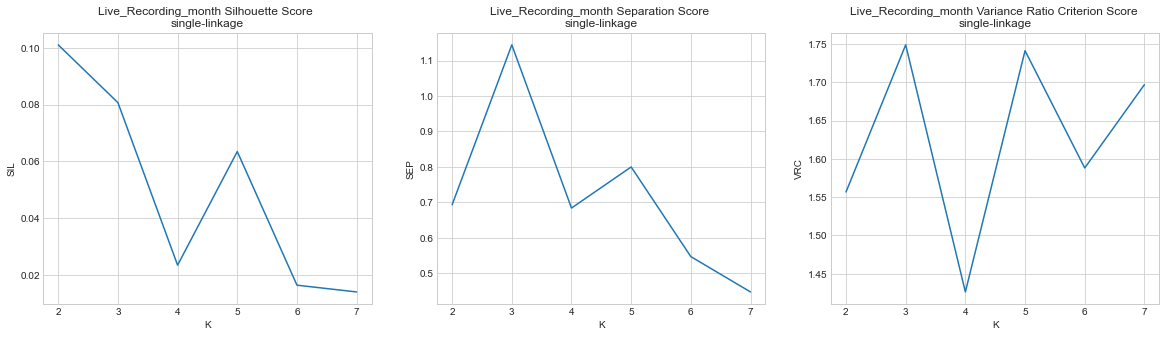

In [1934]:
interpret_dendrogram(7, 'single', df_tss_live_scaled.values)

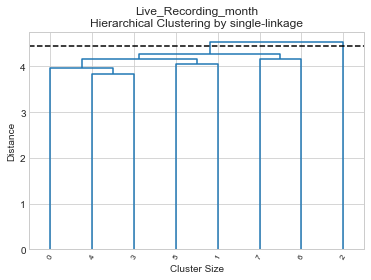

In [1935]:
cut_distance = 4.45
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

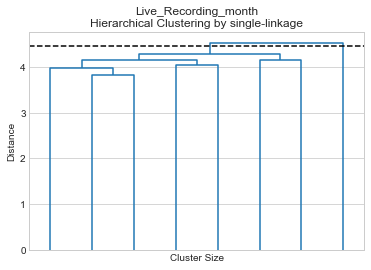

In [1936]:
cut_distance = 4.45
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [1937]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_live_scaled.values)

In [1938]:
model_complete.n_clusters_

8

In [1939]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 5, 1: 3}

Silhouette Score 0.12055926099431191
Separation Score 1.6161092286481153
Variance Ratio Criterion Score 2.11185479558663

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 3, 2: 2}

Silhouette Score 0.11059446248585549
Separation Score 1.283488289836045
Variance Ratio Criterion Score 1.9839408863878725

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.10609282254606615
Separation Score 1.0227284038211921
Variance Ratio Criterion Score 1.9484397301093932

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.06877936450062133
Separation Score 0.8379601537636902
Variance Ratio Criterion Score 1.7964856373496236

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.03832610439980

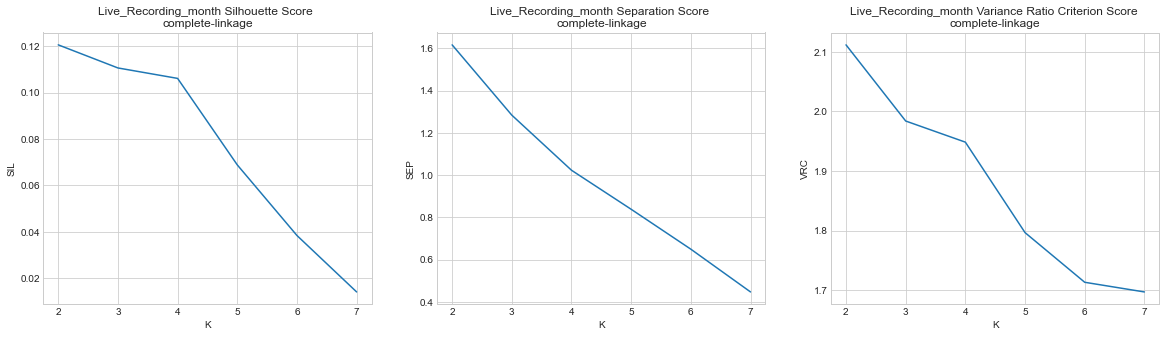

In [1940]:
interpret_dendrogram(7, 'complete', df_tss_live_scaled.values)

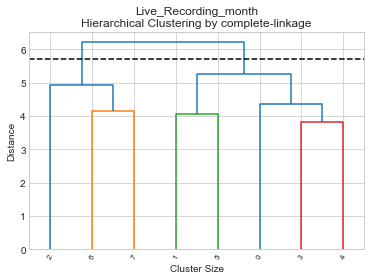

In [1941]:
cut_distance = 5.7
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

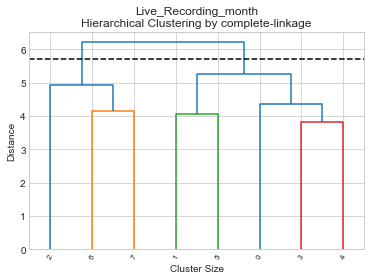

In [1942]:
cut_distance = 5.7
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [1943]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                            linkage='average').fit(df_tss_live_scaled.values)

In [1944]:
model_average.n_clusters_

8

In [1945]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 3, 1: 5}

Silhouette Score 0.12055926099431191
Separation Score 1.6161092286481153
Variance Ratio Criterion Score 2.11185479558663

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 5, 1: 2, 2: 1}

Silhouette Score 0.08066793429717786
Separation Score 1.1443776710046574
Variance Ratio Criterion Score 1.7488291939108631

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 1, 3: 2}

Silhouette Score 0.10609282254606615
Separation Score 1.0227284038211921
Variance Ratio Criterion Score 1.9484397301093932

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 1, 3: 2, 4: 1}

Silhouette Score 0.06877936450062133
Separation Score 0.8379601537636902
Variance Ratio Criterion Score 1.7964856373496234

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0383261043998

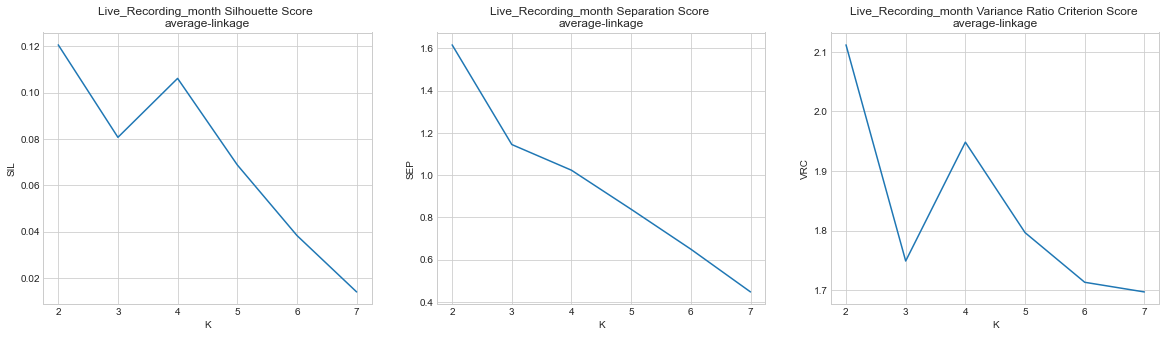

In [1946]:
interpret_dendrogram(7, 'average', df_tss_live_scaled.values)

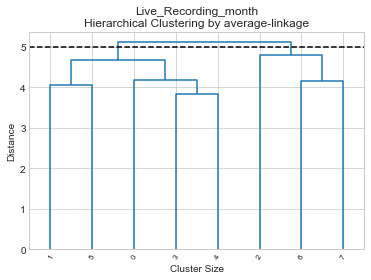

In [1947]:
cut_distance = 5
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

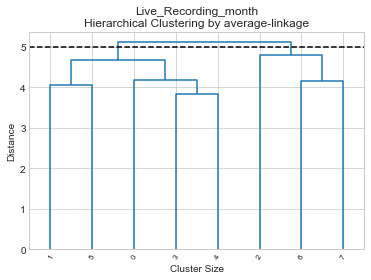

In [1948]:
cut_distance = 5
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [1949]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                        linkage='ward').fit(df_tss_live_scaled.values)

In [1950]:
model_ward.n_clusters_

8

In [1951]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 5, 1: 3}

Silhouette Score 0.12055926099431191
Separation Score 1.6161092286481153
Variance Ratio Criterion Score 2.11185479558663

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 3, 2: 2}

Silhouette Score 0.11059446248585549
Separation Score 1.283488289836045
Variance Ratio Criterion Score 1.9839408863878725

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.10609282254606615
Separation Score 1.0227284038211921
Variance Ratio Criterion Score 1.9484397301093932

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.06877936450062133
Separation Score 0.8379601537636902
Variance Ratio Criterion Score 1.7964856373496236

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.03832610439980

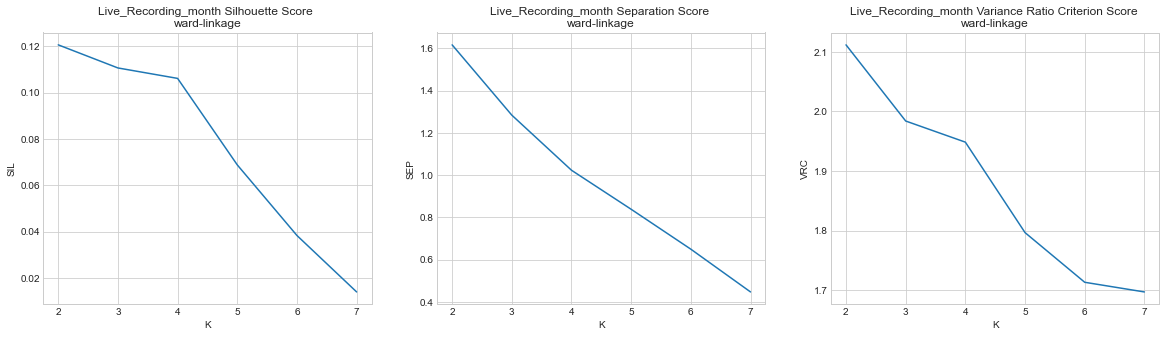

In [1952]:
interpret_dendrogram(7, 'ward', df_tss_live_scaled.values)

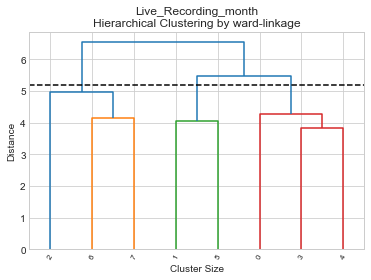

In [1953]:
cut_distance = 5.2
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

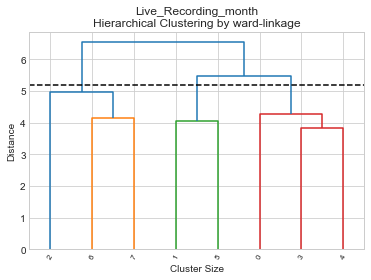

In [1954]:
cut_distance = 5.2
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [1955]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  0.5867461839360113 Silhouette Score:  0.5547730447022219
Calinski-Harabaz:  11.135588583607674 Davies-Bouldin:  0.5377245198205214

k:  3 SSE:  0.18707759732638274 Silhouette Score:  0.5362288517696934
Calinski-Harabaz:  19.8932059802531 Davies-Bouldin:  0.3520338138239591

k:  4 SSE:  0.08531024438172717 Silhouette Score:  0.4022433864099874
Calinski-Harabaz:  24.8566728123942 Davies-Bouldin:  0.16827535395643659

k:  5 SSE:  0.03333116578768743 Silhouette Score:  0.22713474346699902
Calinski-Harabaz:  36.9558564159318 Davies-Bouldin:  0.20795047493180613

k:  6 SSE:  0.007730206418420795 Silhouette Score:  0.20054455983892125
Calinski-Harabaz:  86.3095535506046 Davies-Bouldin:  0.16263231835250871

k:  7 SSE:  0.0006827460670547921 Silhouette Score:  0.16150318026780855
Calinski-Harabaz:  408.8938780335575 Davies-Bouldin:  0.08994000034071557



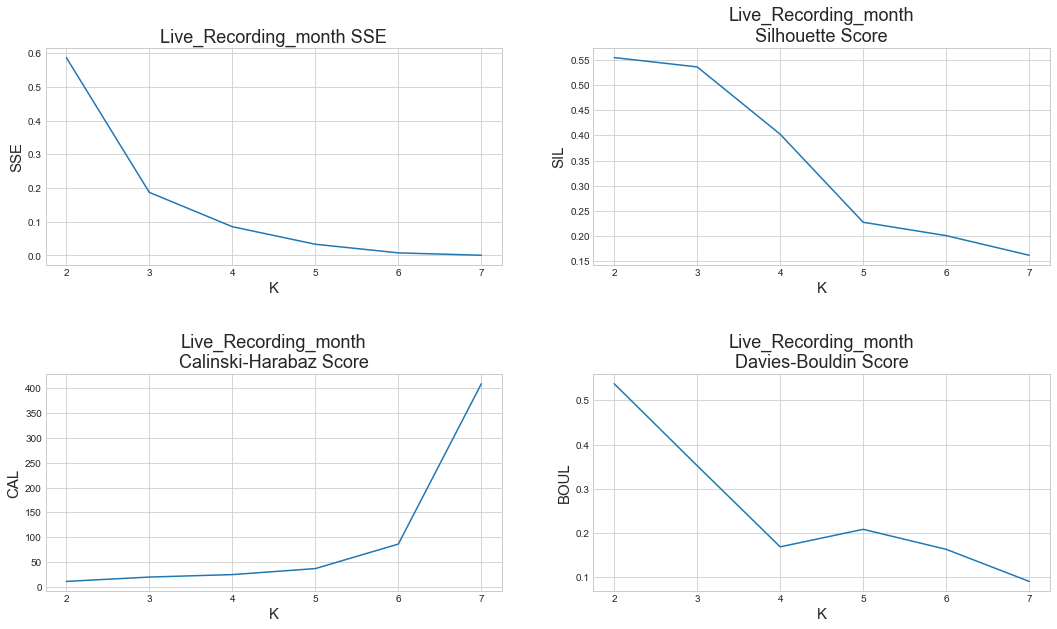

In [1956]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [1957]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 1, 1: 5, 2: 2}

SSE:  0.18707759732638274
Silhouette Score:  0.5362288517696934
Calinski - Harabaz Score:  19.8932059802531
Davies - Bouldin Score:  0.3520338138239591


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

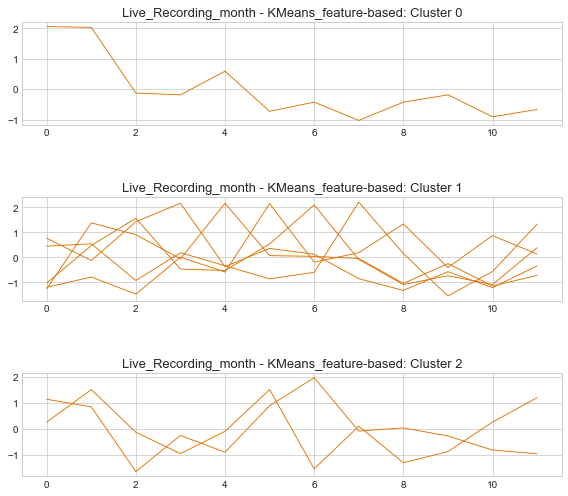

In [1958]:
analyze_clusters(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

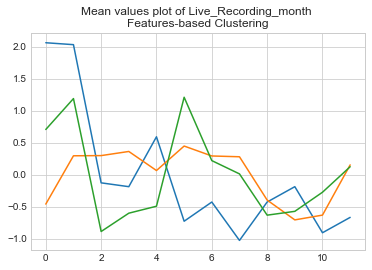

In [1959]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [1960]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [1961]:
print(tss_live_scaled.shape, M.shape)

(8, 12, 1) (8, 8)


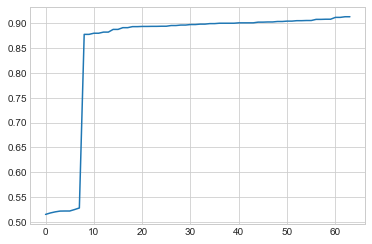

In [1962]:
plt.plot(sorted(M.ravel()))
plt.show()

In [1963]:
dbscan_compression_live = DBSCAN(eps=0.88, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.88, metric='precomputed')

In [1964]:
dbscan_compression_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [1965]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

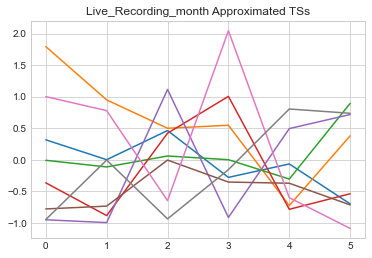

In [1966]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  2.0347147981747216 Silhouette Score:  0.13955520335978686

k:  3 SSE:  1.3835301905511646 Silhouette Score:  0.16307202316377897

k:  4 SSE:  0.951878443296527 Silhouette Score:  0.14288257833031034

k:  5 SSE:  0.6385543671197225 Silhouette Score:  0.09192268031528472

k:  6 SSE:  0.35704251637805257 Silhouette Score:  0.07047578889589656

k:  7 SSE:  0.15178932243655255 Silhouette Score:  0.01944364936810527



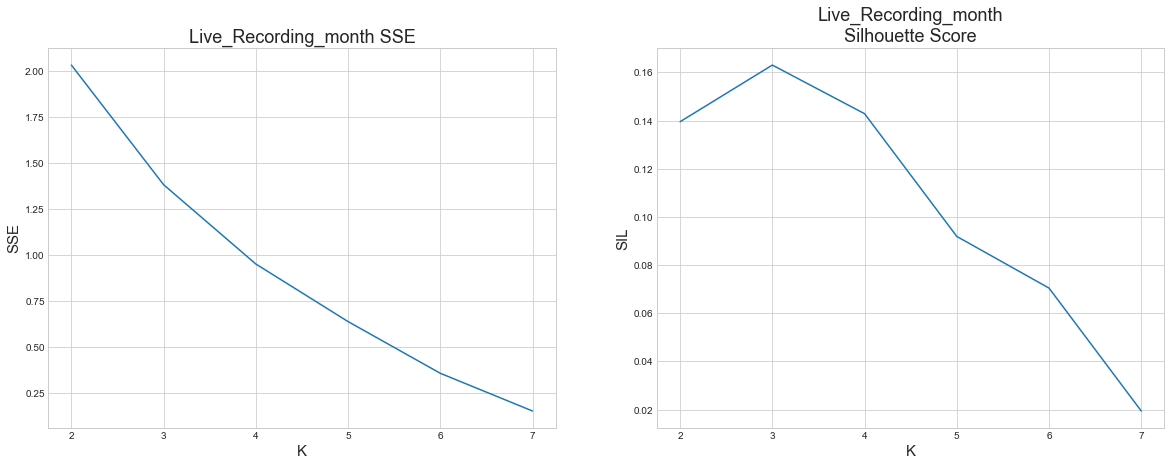

In [1967]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [1968]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  1.3835301905511646
Silhouette Score:  0.16307202316377897


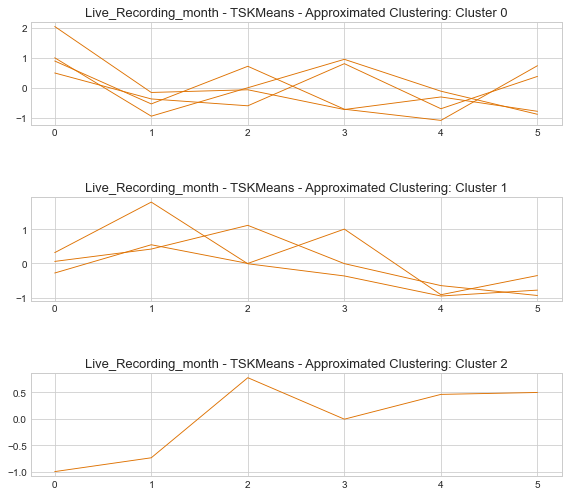

In [1969]:
analyze_clusters(labels_live_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', False)

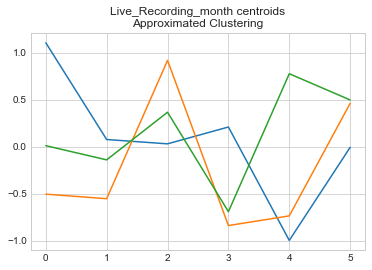

In [1970]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type)

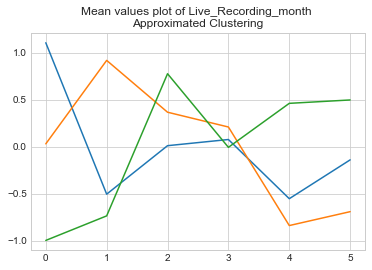

In [1971]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [1972]:
album_type = "Studio_Recording_month - Live_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [1973]:
df_studio_live

January  February  March  April   May  June  July  August  \
track_date_created                                                              
2009_studio             131       145    486   1501  1477   904  1005     353   
2010_studio             949       811    835    754  1180   761   786    1031   
2011_studio            1030       979    855    622   584   664  1145     988   
2012_studio            1103      1194    894    637  1172   992   652     595   
2013_studio            1397       753    954   1946  1122   958   651     695   
2014_studio             789       982    610    658  1150   614   604     815   
2015_studio             737      1051    998    975  1732   948   825     773   
2016_studio            1307      1376   1017    906  1494  1033   917     809   
2009_live               275       205    327    385   186   243   225     148   
2010_live               162       148     28     95    64   150   202     103   
2011_live                77       100     62    144   111   263   133     154   
2012_live                31       214    181    114   268   123   121     115   
2013_live                41        92    129     60    58    94   147      73   
2014_live               110       109     37     35    61    17    27       7   
2015_live                62        65     20     54    38    22    30     116   
2016_live                59        91     49     28    50    91    13      55   

                    September  October  November  December  
track_date_created                                          
2009_studio               321      555       731       657  
2010_studio               968     1001      1151      1263  
2011_studio               585      741       527       802  
2012_studio               650     1144       806       906  
2013_studio               842      939      1016      1303  
2014_studio               332      803       789      1025  
2015_studio               946      937      1069       932  
2016_studio              1493      941       987      1282  
2009_live                 111      170       120       188  
2010_live                 109       94        68        61  
2011_live                 218      121       192       151  
2012_live                  46      101        39        68  
2013_live                  39       51        39        89  
2014_live                  27       35        11        19  
2015_live                  53        1        31        89  
2016_live                  19       30        59        83

In [1974]:
df_studio_live.shape

(16, 12)

In [1975]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[1.310e+02],
        [1.450e+02],
        [4.860e+02],
        [1.501e+03],
        [1.477e+03],
        [9.040e+02],
        [1.005e+03],
        [3.530e+02],
        [3.210e+02],
        [5.550e+02],
        [7.310e+02],
        [6.570e+02]],

       [[9.490e+02],
        [8.110e+02],
        [8.350e+02],
        [7.540e+02],
        [1.180e+03],
        [7.610e+02],
        [7.860e+02],
        [1.031e+03],
        [9.680e+02],
        [1.001e+03],
        [1.151e+03],
        [1.263e+03]],

       [[1.030e+03],
        [9.790e+02],
        [8.550e+02],
        [6.220e+02],
        [5.840e+02],
        [6.640e+02],
        [1.145e+03],
        [9.880e+02],
        [5.850e+02],
        [7.410e+02],
        [5.270e+02],
        [8.020e+02]],

       [[1.103e+03],
        [1.194e+03],
        [8.940e+02],
        [6.370e+02],
        [1.172e+03],
        [9.920e+02],
        [6.520e+02],
        [5.950e+02],
        [6.500e+02],
        [1.144e+03],
        [8.060e+02],
       

In [1976]:
tss_studio_live.shape

(16, 12, 1)

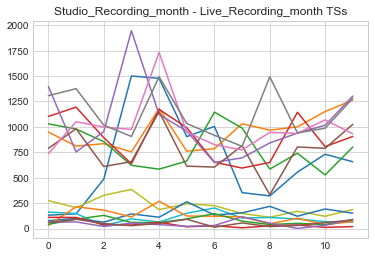

In [1977]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [1978]:
tss_studio_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[-1.26218114e+00],
        [-1.23050405e+00],
        [-4.58940676e-01],
        [ 1.83764825e+00],
        [ 1.78334467e+00],
        [ 4.86846683e-01],
        [ 7.15374250e-01],
        [-7.59873018e-01],
        [-8.32277792e-01],
        [-3.02817883e-01],
        [ 9.54083739e-02],
        [-7.20276657e-02]],

       [[-5.09749520e-02],
        [-8.78568290e-01],
        [-7.34639014e-01],
        [-1.22040032e+00],
        [ 1.33434433e+00],
        [-1.17842095e+00],
        [-1.02849462e+00],
        [ 4.40783408e-01],
        [ 6.29690583e-02],
        [ 2.60871813e-01],
        [ 1.16042979e+00],
        [ 1.83209974e+00]],

       [[ 1.20413941e+00],
        [ 9.44472983e-01],
        [ 3.13127161e-01],
        [-8.73192003e-01],
        [-1.06666895e+00],
        [-6.59349064e-01],
        [ 1.78966174e+00],
        [ 9.90296470e-01],
        [-1.06157745e+00],
        [-2.67303674e-01],
        [-1.35688437e+00],
        [ 4.32777378e-02]],

       [[ 9.57100852e-

In [1979]:
tss_studio_live_scaled.shape

(16, 12, 1)

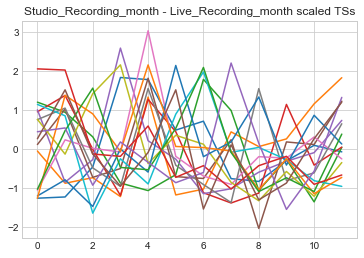

In [1980]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [1981]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  
track_date_created                      
2009_studio         0.095408 -0.072028  
2010_studio         1.160430  1.832100  
2011_studio        -1.356884  0.043278  
2012_studio        -0.412272  0.048796  
2013_studio        -0.092369  0.736064  
2014_studio         0.116706  1.229542  
2015_studio         0.310298 -0.253381  
2016_studio        -0.612254  0.649317  
2009_live          -1.213333 -0.347121  
2010_live          -0.812618 -0.958472  
2011_live           0.867696  0.129104  
2012_live          -1.147029 -0.728177  
2013_live          -1.092020  0.383683  
2014_live          -0.905908 -0.666329  
2015_live          -0.569309  1.326572  
2016_live           0.264888  1.206714

<h3>Euclidean Distance</h3>

k:  2 SSE:  8.842698916265288 Silhouette Score:  0.1277838401164948

k:  3 SSE:  7.346326748197212 Silhouette Score:  0.10822338503347023

k:  4 SSE:  5.708131286833799 Silhouette Score:  0.16371884425940603

k:  5 SSE:  4.912359834418648 Silhouette Score:  0.1540978606974831

k:  6 SSE:  4.278656424686388 Silhouette Score:  0.1396305362878699

k:  7 SSE:  3.4030282742430886 Silhouette Score:  0.14549835781795611

k:  8 SSE:  2.8454892826034004 Silhouette Score:  0.14600697265885554

k:  9 SSE:  2.2963490814875644 Silhouette Score:  0.12907158610993996

k:  10 SSE:  1.889712534182695 Silhouette Score:  0.11345825633598397

k:  11 SSE:  1.4199179304774086 Silhouette Score:  0.10767560008545157

k:  12 SSE:  1.0880312229216145 Silhouette Score:  0.08253896139125642

k:  13 SSE:  0.7654108515498643 Silhouette Score:  0.06544802494054669

k:  14 SSE:  0.48312388455745625 Silhouette Score:  0.03955485755976551

k:  15 SSE:  0.22858787644852527 Silhouette Score:  0.026064917063819915



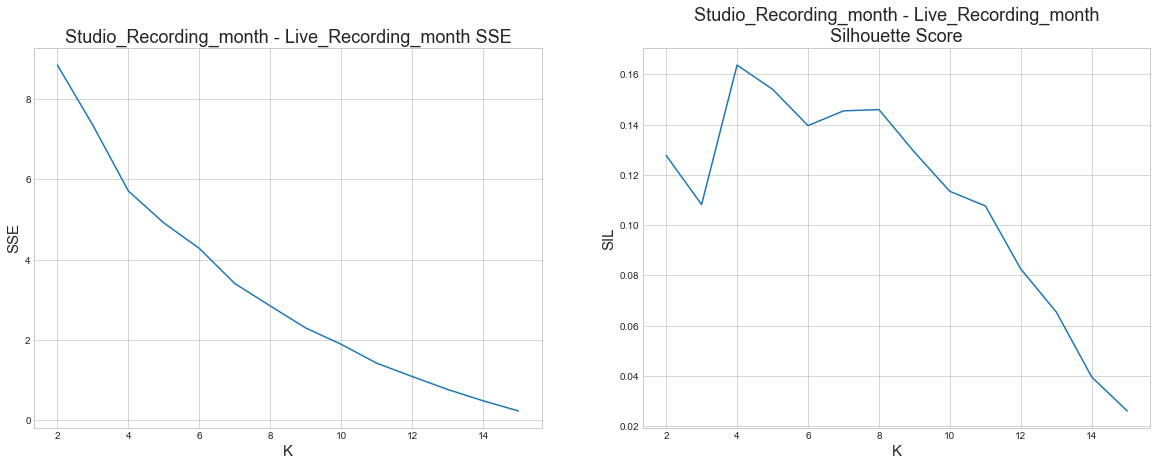

In [1982]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 6**

In [1983]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(6, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (6, 12, 1)

Labels:  {0: 2, 1: 6, 2: 1, 3: 2, 4: 3, 5: 2}

SSE:  4.26252795661889
Silhouette Score:  0.13655686774157913


In [1984]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       5  
2010_studio         1.160430  1.832100       3  
2011_studio        -1.356884  0.043278       4  
2012_studio        -0.412272  0.048796       1  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       5  
2016_studio        -0.612254  0.649317       1  
2009_live          -1.213333 -0.347121       0  
2010_live          -0.812618 -0.958472       4  
2011_live           0.867696  0.129104       2  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       4  
2014_live          -0.905908 -0.666329       1  
2015_live          -0.569309  1.326572       3  
2016_live           0.264888  1.206714       1

Cluster 0
 ['2013_studio', '2009_live']

Cluster 1
 ['2012_studio', '2014_studio', '2016_studio', '2012_live', '2014_live', '2016_live']

Cluster 2
 ['2011_live']

Cluster 3
 ['2010_studio', '2015_live']

Cluster 4
 ['2011_studio', '2010_live', '2013_live']

Cluster 5
 ['2009_studio', '2015_studio']



**Centroids**

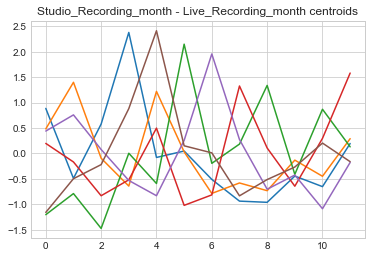

In [1985]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

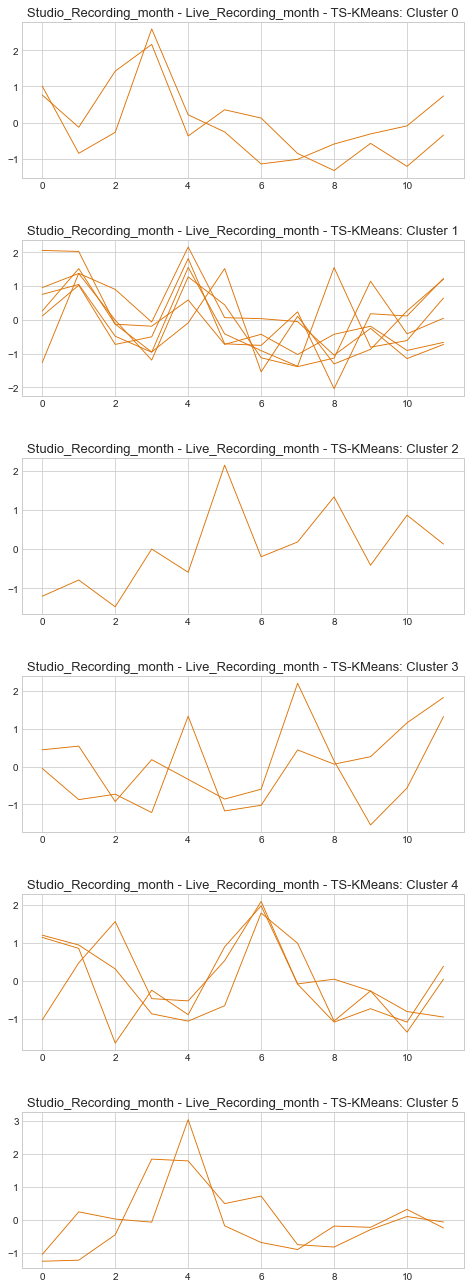

In [1986]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, album_type, 'TS-KMeans', True)

<h3>DTW distance</h3>

k:  2 SSE:  3.3083167858732394 Silhouette Score:  0.2384724575950979

k:  3 SSE:  2.6487663502743892 Silhouette Score:  0.197185879392947

k:  4 SSE:  2.152120900323946 Silhouette Score:  0.16455076089613965

k:  5 SSE:  1.8414817371758452 Silhouette Score:  0.12840373493119242

k:  6 SSE:  1.5732443082143437 Silhouette Score:  0.16033861116268705

k:  7 SSE:  1.1681224415154348 Silhouette Score:  0.18179918483808466

k:  8 SSE:  0.9641766663439861 Silhouette Score:  0.16060951425286532

k:  9 SSE:  0.7265572833784608 Silhouette Score:  0.15708279774764944

k:  10 SSE:  0.643846595454771 Silhouette Score:  0.13413159881550876

k:  11 SSE:  0.47155161954233393 Silhouette Score:  0.12233845059213536

k:  12 SSE:  0.3568506075638821 Silhouette Score:  0.1086780359448665

k:  13 SSE:  0.2367821937537231 Silhouette Score:  0.09569553706437504

k:  14 SSE:  0.14524252201987747 Silhouette Score:  0.06373790078690789

k:  15 SSE:  0.0635539084699341 Silhouette Score:  0.03833243775626887



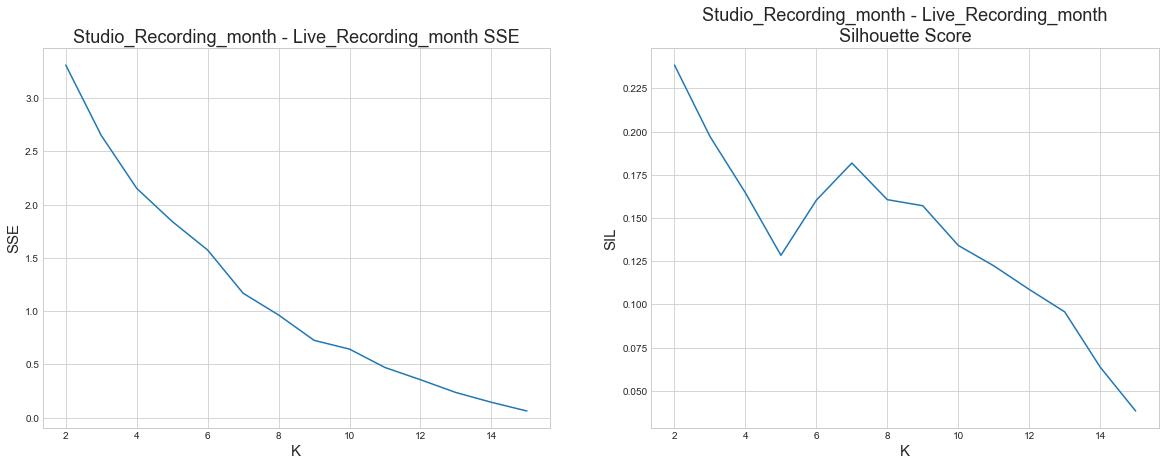

In [1987]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 7**

In [1988]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, labels_studio_live_dtw = run_kmeans(7, 1000, 10, 'dtw',\
                                                                    tss_studio_live_scaled, False)

cluster_centers_shape (7, 12, 1)

Labels:  {0: 3, 1: 2, 2: 3, 3: 3, 4: 2, 5: 1, 6: 2}

SSE:  1.2633965046616311
Silhouette Score:  0.1703834052283426


In [1989]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       2  
2010_studio         1.160430  1.832100       3  
2011_studio        -1.356884  0.043278       0  
2012_studio        -0.412272  0.048796       6  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       3  
2015_studio         0.310298 -0.253381       2  
2016_studio        -0.612254  0.649317       6  
2009_live          -1.213333 -0.347121       4  
2010_live          -0.812618 -0.958472       4  
2011_live           0.867696  0.129104       2  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       5  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       3

Cluster 0
 ['2011_studio', '2013_studio', '2015_live']

Cluster 1
 ['2012_live', '2013_live']

Cluster 2
 ['2009_studio', '2015_studio', '2011_live']

Cluster 3
 ['2010_studio', '2014_studio', '2016_live']

Cluster 4
 ['2009_live', '2010_live']

Cluster 5
 ['2014_live']

Cluster 6
 ['2012_studio', '2016_studio']



**Centroids**

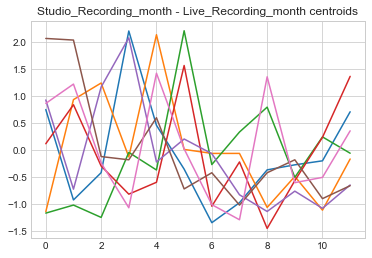

In [1990]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

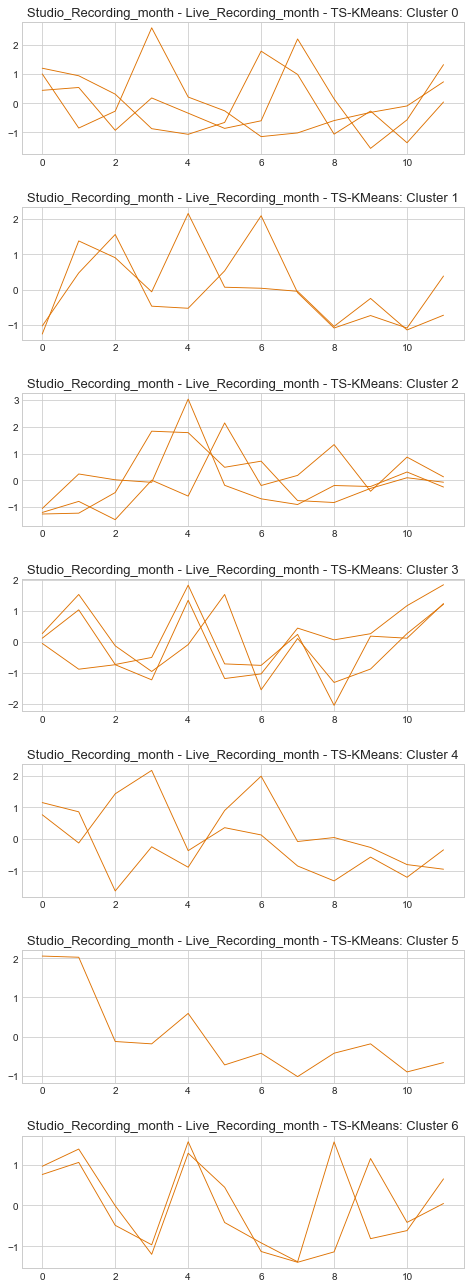

In [1991]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, album_type, 'TS-KMeans', True)

<h3>KMeans sklearn</h3>

k:  2 SSE:  139.32636849305544 Silhouette Score:  0.13128632513261998
Calinski-Harabaz:  3.243441485422791 Davies-Bouldin:  2.0567966607542885

k:  3 SSE:  112.29240657428703 Silhouette Score:  0.16094538320082075
Calinski-Harabaz:  3.4332689999524804 Davies-Bouldin:  1.5455474189181875

k:  4 SSE:  91.88887078478352 Silhouette Score:  0.17024498266210672
Calinski-Harabaz:  3.4700981179549393 Davies-Bouldin:  1.3854960659022295

k:  5 SSE:  80.78891106234119 Silhouette Score:  0.1432558101548199
Calinski-Harabaz:  3.091308841559416 Davies-Bouldin:  1.225159790470848

k:  6 SSE:  63.14502902956971 Silhouette Score:  0.177958781716251
Calinski-Harabaz:  3.435256672294646 Davies-Bouldin:  1.078107177575092

k:  7 SSE:  59.00162591657254 Silhouette Score:  0.12414710909800558
Calinski-Harabaz:  2.8627116417160416 Davies-Bouldin:  1.005171285167324

k:  8 SSE:  46.192799690032274 Silhouette Score:  0.13305287789089904
Calinski-Harabaz:  3.102819272493272 Davies-Bouldin:  0.8747709201395977


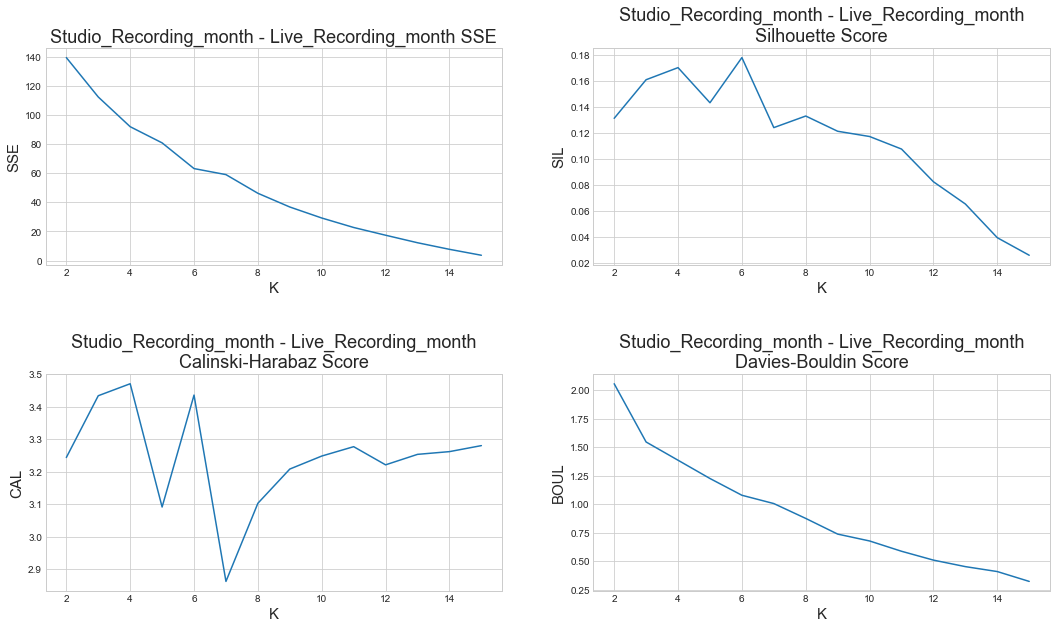

In [1992]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [1993]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(3, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (3, 12)

Labels:  {0: 4, 1: 7, 2: 5}

SSE:  114.22978926892644
Silhouette Score:  0.13471367719239324
Calinski - Harabaz Score:  3.2647968038215818
Davies - Bouldin Score:  1.6073143659242912


In [1994]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_2)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       0  
2010_studio         1.160430  1.832100       1  
2011_studio        -1.356884  0.043278       2  
2012_studio        -0.412272  0.048796       1  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       1  
2016_studio        -0.612254  0.649317       1  
2009_live          -1.213333 -0.347121       0  
2010_live          -0.812618 -0.958472       2  
2011_live           0.867696  0.129104       0  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       2  
2014_live          -0.905908 -0.666329       2  
2015_live          -0.569309  1.326572       2  
2016_live           0.264888  1.206714       1

Cluster 0
 ['2009_studio', '2013_studio', '2009_live', '2011_live']

Cluster 1
 ['2010_studio', '2012_studio', '2014_studio', '2015_studio', '2016_studio', '2012_live', '2016_live']

Cluster 2
 ['2011_studio', '2010_live', '2013_live', '2014_live', '2015_live']



<h3>DBSCAN</h3>

In [1995]:
dist = pdist(df_tss_studio_live_scaled, 'euclidean') #pair wise distance
#print (dist)
dist = squareform(dist) #distance matrix given the vector dist
#print()
#print(dist)

In [1996]:
k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

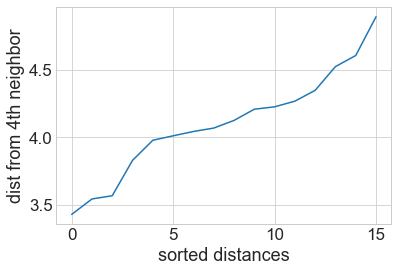

In [1997]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [1998]:
eps_to_test = [3.5, 3.6, 3.7, 3.8, 3.9, 4.0]
min_samples_to_test = [2, 3, 4, 5, 6, 7, 8]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [3.5, 3.6, 3.7, 3.8, 3.9, 4.0]
min_samples: [2, 3, 4, 5, 6, 7, 8]


In [1999]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [2000]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_studio_live_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 3.5 and min_samples =   2 | 4.466    3
  2 | Tested with eps = 3.5 and min_samples =   3 | 4.237    2
  3 | Tested with eps = 3.5 and min_samples =   4 | 4.084    1
  4 | Tested with eps = 3.5 and min_samples =   5 | 3.975    1
  5 | Tested with eps = 3.5 and min_samples =   6 | 3.853    0
  6 | Tested with eps = 3.5 and min_samples =   7 | 3.853    0
  7 | Tested with eps = 3.5 and min_samples =   8 | 3.853    0
  8 | Tested with eps = 3.6 and min_samples =   2 | 4.466    3
  9 | Tested with eps = 3.6 and min_samples =   3 | 4.237    2
 10 | Tested with eps = 3.6 and min_samples =   4 | 4.133    1
 11 | Tested with eps = 3.6 and min_samples =   5 | 4.133    1
 12 | Tested with eps = 3.6 and min_samples =   6 | 4.016    1
 13 | Tested with eps = 3.6 and min_samples =   7 | 3.853    0
 14 | Tested with eps = 3.6 and min_samples =   8

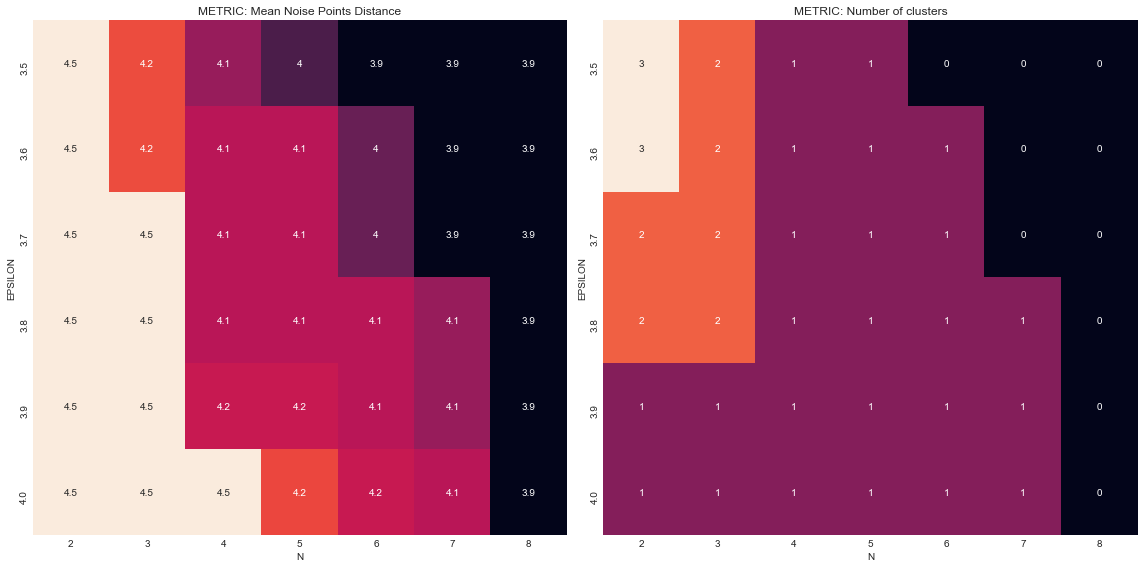

In [2001]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [2002]:
best_dbscan_model = DBSCAN(eps = 3.6, min_samples = 2)

# Fitting
best_dbscan_model.fit(df_tss_studio_live_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=3.6, min_samples=2)

In [2003]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0,  1,  2]), array([2, 9, 3, 2]))

In [2004]:
cluster_insight(df_tss_studio_live_scaled, best_dbscan_model.labels_)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       0  
2010_studio         1.160430  1.832100       0  
2011_studio        -1.356884  0.043278       1  
2012_studio        -0.412272  0.048796       0  
2013_studio        -0.092369  0.736064       2  
2014_studio         0.116706  1.229542       0  
2015_studio         0.310298 -0.253381       0  
2016_studio        -0.612254  0.649317       0  
2009_live          -1.213333 -0.347121       2  
2010_live          -0.812618 -0.958472       1  
2011_live           0.867696  0.129104      -1  
2012_live          -1.147029 -0.728177       0  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       0  
2015_live          -0.569309  1.326572      -1  
2016_live           0.264888  1.206714       0

Cluster -1
 ['2011_live', '2015_live']

Cluster 0
 ['2009_studio', '2010_studio', '2012_studio', '2014_studio', '2015_studio', '2016_studio', '2012_live', '2014_live', '2016_live']

Cluster 1
 ['2011_studio', '2010_live', '2013_live']

Cluster 2
 ['2013_studio', '2009_live']



<h3>Hierarchical Clustering</h3>

**Single**

In [2005]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_studio_live_scaled.values)

In [2006]:
model_single.n_clusters_

16

In [2007]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 15, 1: 1}

Silhouette Score 0.10827440425741497
Separation Score 0.7515676824148397
Variance Ratio Criterion Score 1.5336845242907915

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 14, 1: 1, 2: 1}

Silhouette Score 0.018884533130970337
Separation Score 0.8143729440619184
Variance Ratio Criterion Score 1.3628558837425322

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 11, 1: 3, 2: 1, 3: 1}

Silhouette Score 0.06605473814204804
Separation Score 1.0427912938991344
Variance Ratio Criterion Score 2.206643055688403

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 9, 1: 3, 2: 1, 3: 1, 4: 2}

Silhouette Score 0.11368178544163801
Separation Score 0.9999589741119028
Variance Ratio Criterion Score 2.5841853838575353

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 8, 1: 3, 2: 1, 3: 1, 4: 2, 5: 1}

Silhouette Score 0.07736152

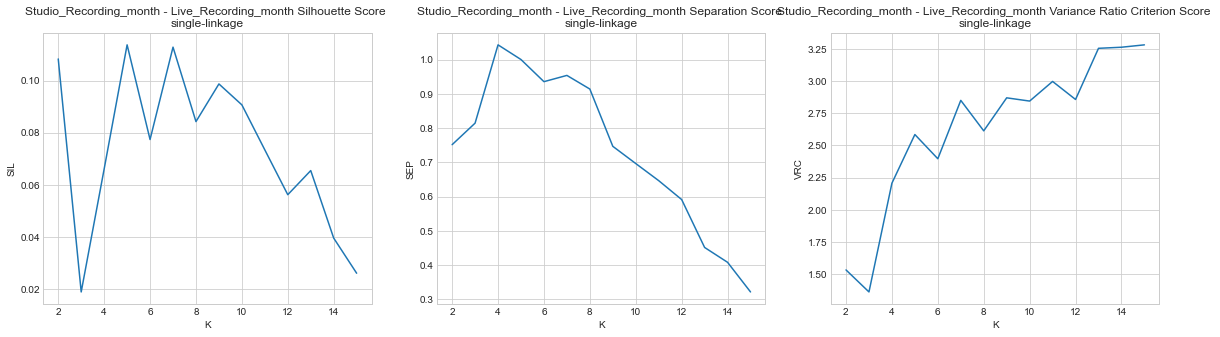

In [2008]:
interpret_dendrogram(15, 'single', df_tss_studio_live_scaled.values)

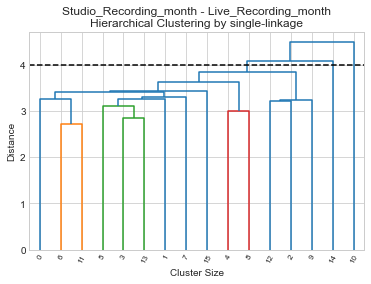

In [2009]:
cut_distance = 4
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

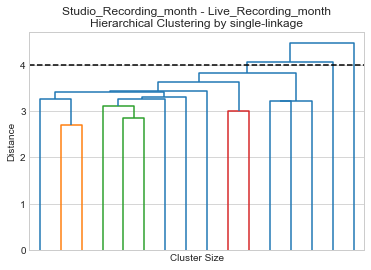

In [2010]:
cut_distance = 4
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [2011]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_studio_live_scaled.values)

In [2012]:
model_complete.n_clusters_

16

In [2013]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 10, 1: 6}

Silhouette Score 0.09477158595395138
Separation Score 2.2339109445913414
Variance Ratio Criterion Score 2.537402589789532

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 6, 1: 6, 2: 4}

Silhouette Score 0.08850074157326357
Separation Score 1.8670385782226686
Variance Ratio Criterion Score 2.536777636577797

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 6, 1: 5, 2: 4, 3: 1}

Silhouette Score 0.08855279659442787
Separation Score 1.4607234965586873
Variance Ratio Criterion Score 2.4885713895740125

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 5, 1: 3, 2: 4, 3: 1, 4: 3}

Silhouette Score 0.12977925208346677
Separation Score 1.2058910072165976
Variance Ratio Criterion Score 3.070614575658466

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 3, 3: 1, 4: 3, 5: 2}

Silhouette Score 0.1779587817162

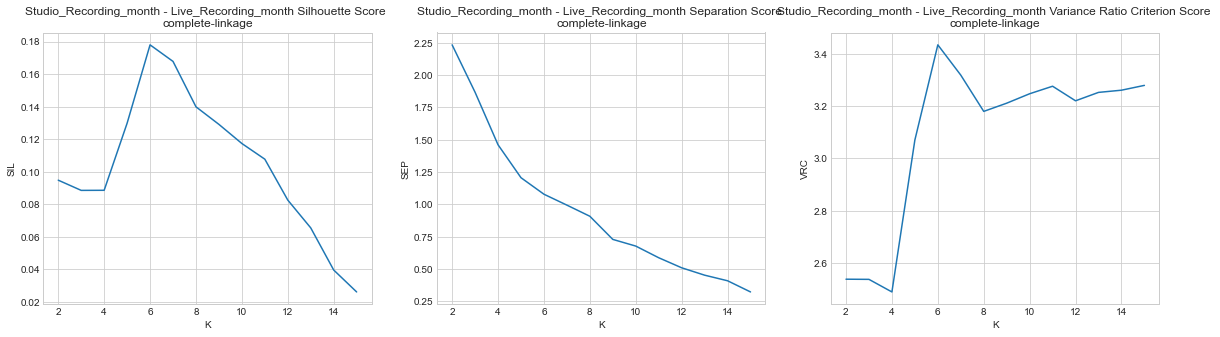

In [2014]:
interpret_dendrogram(15, 'complete', df_tss_studio_live_scaled.values)

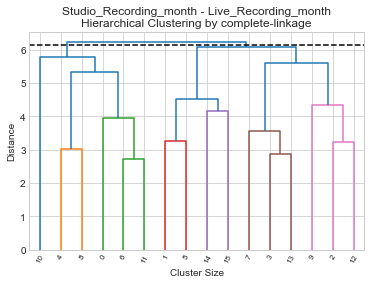

In [2015]:
cut_distance = 6.15
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

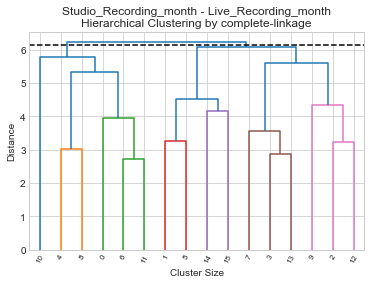

In [2016]:
cut_distance = 6.15
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [2017]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='average').fit(df_tss_studio_live_scaled.values)

In [2018]:
model_average.n_clusters_

16

In [2019]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 15, 1: 1}

Silhouette Score 0.10827440425741497
Separation Score 0.7515676824148397
Variance Ratio Criterion Score 1.5336845242907915

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 11, 1: 1, 2: 4}

Silhouette Score 0.10691357818910134
Separation Score 1.3485840750983213
Variance Ratio Criterion Score 2.4955059439874745

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 2, 2: 9, 3: 1}

Silhouette Score 0.14418865308494674
Separation Score 1.2200169780804164
Variance Ratio Criterion Score 2.7379212121142613

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 9, 1: 2, 2: 3, 3: 1, 4: 1}

Silhouette Score 0.11368178544163801
Separation Score 0.9999589741119028
Variance Ratio Criterion Score 2.5841853838575353

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 6, 1: 2, 2: 3, 3: 1, 4: 1, 5: 3}

Silhouette Score 0.136303320

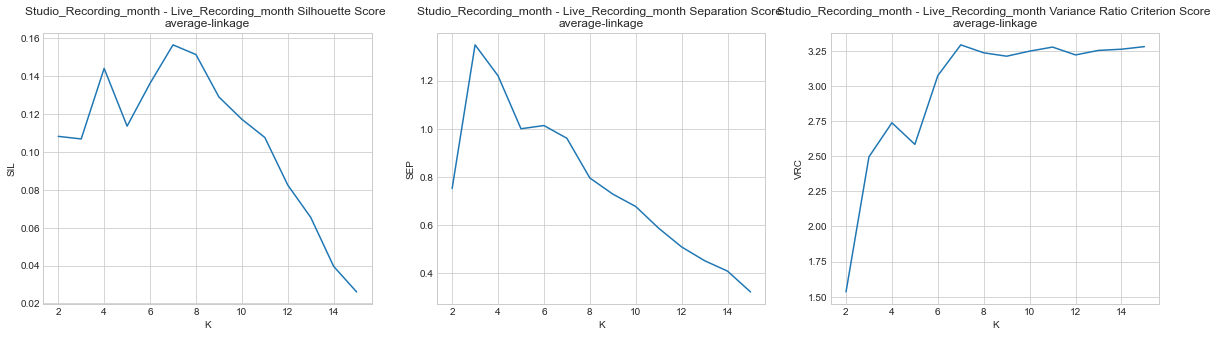

In [2020]:
interpret_dendrogram(15, 'average', df_tss_studio_live_scaled.values)

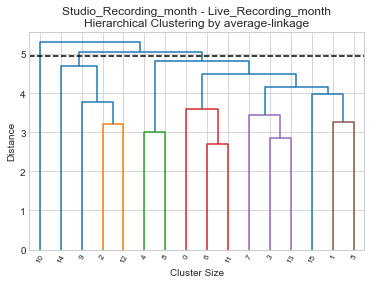

In [2021]:
cut_distance = 4.95
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

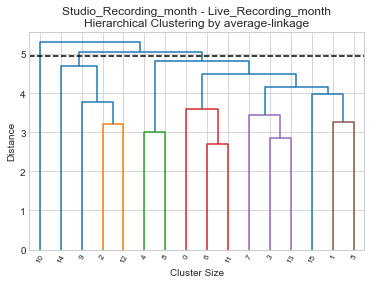

In [2022]:
cut_distance = 4.95
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [2023]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='ward').fit(df_tss_studio_live_scaled.values)

In [2024]:
model_ward.n_clusters_

16

In [2025]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 13, 1: 3}

Silhouette Score 0.13399218969807447
Separation Score 1.4990557621724117
Variance Ratio Criterion Score 2.880642327745938

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 8, 1: 3, 2: 5}

Silhouette Score 0.12482885084308967
Separation Score 1.743757139357837
Variance Ratio Criterion Score 3.02973742855107

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 5, 1: 3, 2: 5, 3: 3}

Silhouette Score 0.12783910726953976
Separation Score 1.5104311393993757
Variance Ratio Criterion Score 3.074485858911389

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 5, 1: 3, 2: 3, 3: 3, 4: 2}

Silhouette Score 0.16559652246880927
Separation Score 1.3049104709565775
Variance Ratio Criterion Score 3.2163111841625547

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 3, 3: 3, 4: 2, 5: 1}

Silhouette Score 0.177958781716251

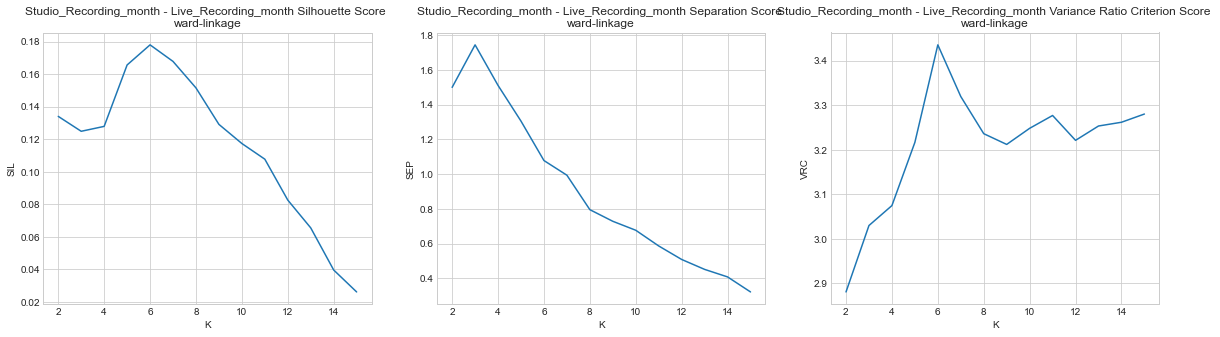

In [2026]:
interpret_dendrogram(15, 'ward', df_tss_studio_live_scaled.values)

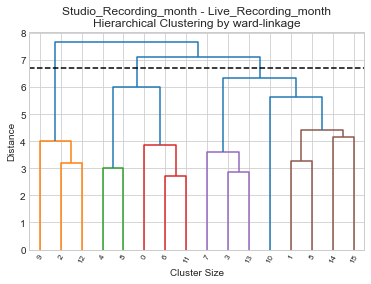

In [2027]:
cut_distance = 6.7
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

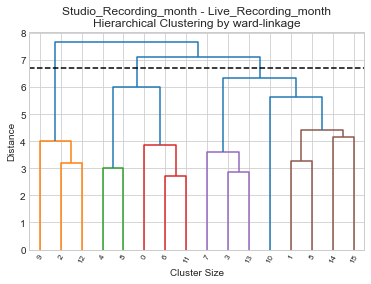

In [2028]:
cut_distance = 6.7
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [2029]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  8.773759588744339 Silhouette Score:  0.754863401388787
Calinski-Harabaz:  39.05160488126425 Davies-Bouldin:  0.1225628233003499

k:  3 SSE:  3.974043323218126 Silhouette Score:  0.4124114698100193
Calinski-Harabaz:  47.87972163708126 Davies-Bouldin:  0.5489076653760021

k:  4 SSE:  1.6140154024341564 Silhouette Score:  0.4832162817914924
Calinski-Harabaz:  78.39645692233306 Davies-Bouldin:  0.4873207327992506

k:  5 SSE:  1.0623480150206326 Silhouette Score:  0.4172648385798301
Calinski-Harabaz:  83.31411432984586 Davies-Bouldin:  0.3234666685215391

k:  6 SSE:  0.6335631225335849 Silhouette Score:  0.42812881947320114
Calinski-Harabaz:  102.95335496077453 Davies-Bouldin:  0.271999589513934

k:  7 SSE:  0.36158106059767997 Silhouette Score:  0.382650280662766
Calinski-Harabaz:  136.42462300032594 Davies-Bouldin:  0.30607141745009775

k:  8 SSE:  0.2238157147344755 Silhouette Score:  0.3313990765214954
Calinski-Harabaz:  168.62583050450377 Davies-Bouldin:  0.3054258562016954

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  9 SSE:  0.1598348913248533 Silhouette Score:  0.26694514118578283
Calinski-Harabaz:  181.13392463431563 Davies-Bouldin:  0.2879055849006977

k:  10 SSE:  0.10363044968724673 Silhouette Score:  0.22376863177717443
Calinski-Harabaz:  213.2169794688802 Davies-Bouldin:  0.2966889221938625

k:  11 SSE:  0.07318978688576935 Silhouette Score:  0.19697226903016118
Calinski-Harabaz:  226.6306493660964 Davies-Bouldin:  0.2810467602172082

k:  12 SSE:  0.045655447810011435 Silhouette Score:  0.14287131167417802
Calinski-Harabaz:  264.44425316112665 Davies-Bouldin:  0.21175098150990102

k:  13 SSE:  0.020054488440744794 Silhouette Score:  0.12957621986013915
Calinski-Harabaz:  414.2119263525233 Davies-Bouldin:  0.18421733847223526



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  14 SSE:  0.007730206418420796 Silhouette Score:  0.10027227991946062
Calinski-Harabaz:  661.5318906926141 Davies-Bouldin:  0.09937971465942606

k:  15 SSE:  0.0006827460670547921 Silhouette Score:  0.08075159013390427
Calinski-Harabaz:  3478.2441193706672 Davies-Bouldin:  0.05239004239907888



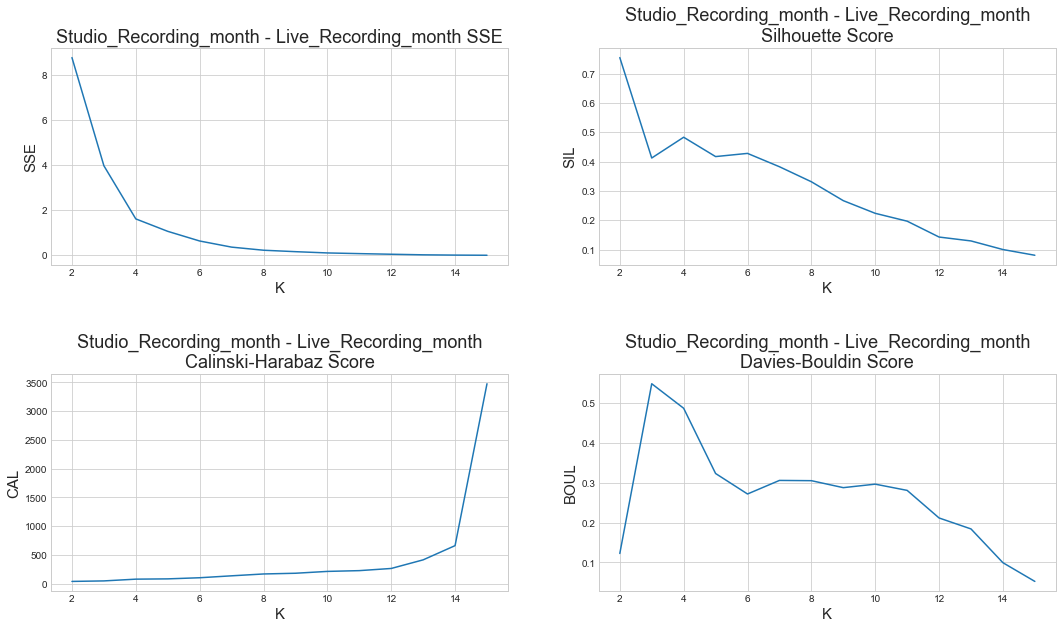

In [2030]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [2031]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(4, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (4, 5)

Labels:  {0: 2, 1: 1, 2: 8, 3: 5}

SSE:  1.6140154024341564
Silhouette Score:  0.4832162817914924
Calinski - Harabaz Score:  78.39645692233304
Davies - Bouldin Score:  0.4873207327992506


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

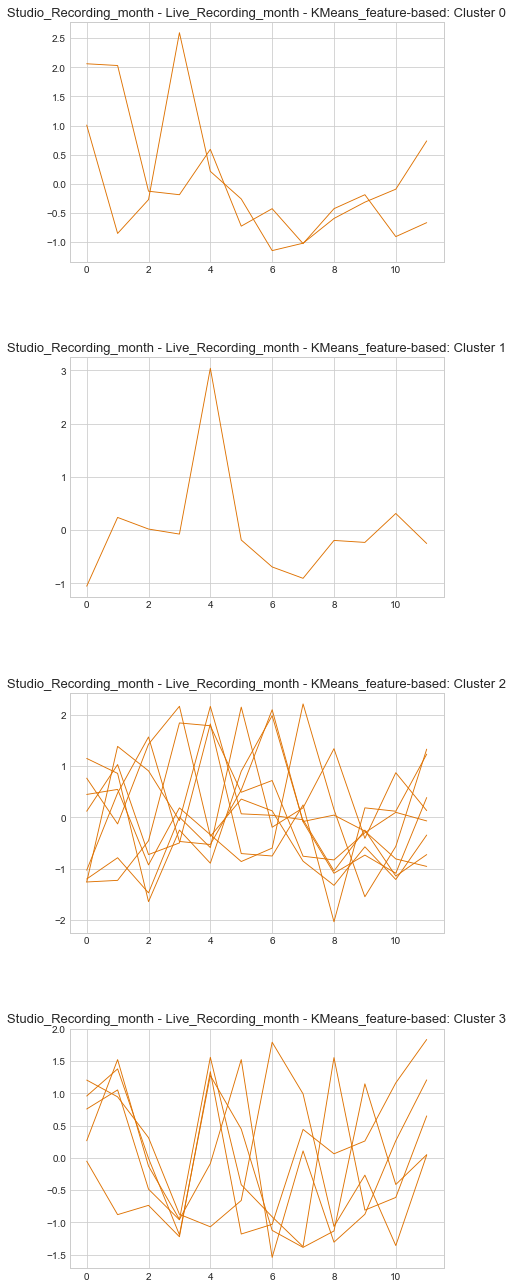

In [2032]:
analyze_clusters(labels_studio_live_fb, tss_studio_live_scaled, album_type, 'KMeans_feature-based', True)

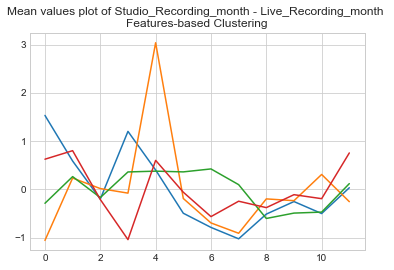

In [2033]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [2034]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [2035]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 12, 1) (16, 16)


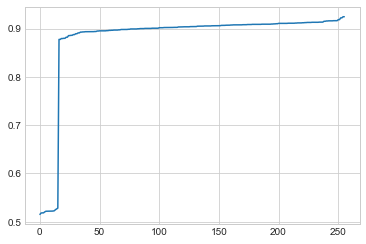

In [2036]:
plt.plot(sorted(M.ravel()))
plt.show()

In [2037]:
dbscan_compression_studio_live = DBSCAN(eps=0.88, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.88, metric='precomputed')

In [2038]:
dbscan_compression_studio_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [2039]:
n_paa_segments = 8
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

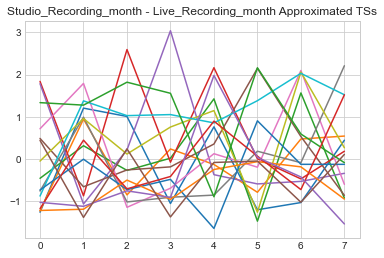

In [2040]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  6.583736078032443 Silhouette Score:  0.1613897734544879

k:  3 SSE:  4.885498608368253 Silhouette Score:  0.228841908276526

k:  4 SSE:  4.052872187033398 Silhouette Score:  0.17850527330590393

k:  5 SSE:  3.4218689022794755 Silhouette Score:  0.18690860865156014

k:  6 SSE:  2.606454239371829 Silhouette Score:  0.23358576316006519

k:  7 SSE:  2.19706782456041 Silhouette Score:  0.20812411026387123

k:  8 SSE:  1.8682093535982185 Silhouette Score:  0.17826892484837073

k:  9 SSE:  1.3220019295300465 Silhouette Score:  0.18398800779528046

k:  10 SSE:  0.9470483894056665 Silhouette Score:  0.18944712270617925

k:  11 SSE:  0.700949657515423 Silhouette Score:  0.16577565104177255

k:  12 SSE:  0.5087185237064382 Silhouette Score:  0.1597112724865878

k:  13 SSE:  0.3213124443678129 Silhouette Score:  0.11902335913835839

k:  14 SSE:  0.17297567165756775 Silhouette Score:  0.07572171237772016

k:  15 SSE:  0.040398201955985306 Silhouette Score:  0.055370984261126174



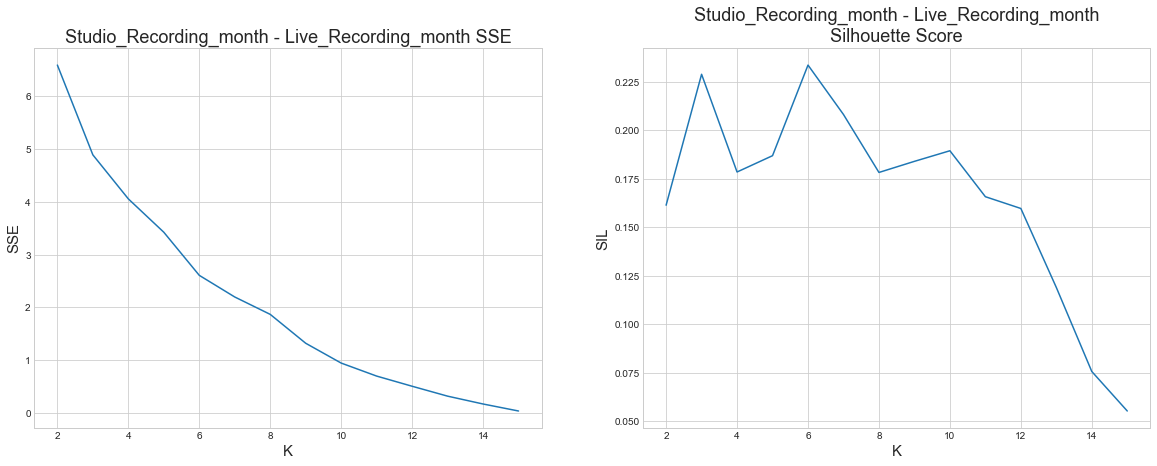

In [2041]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [2042]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(6, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (6, 8, 1)

Labels:  {0: 1, 1: 6, 2: 2, 3: 3, 4: 2, 5: 2}

SSE:  2.7912940975851583
Silhouette Score:  0.18267490503711326


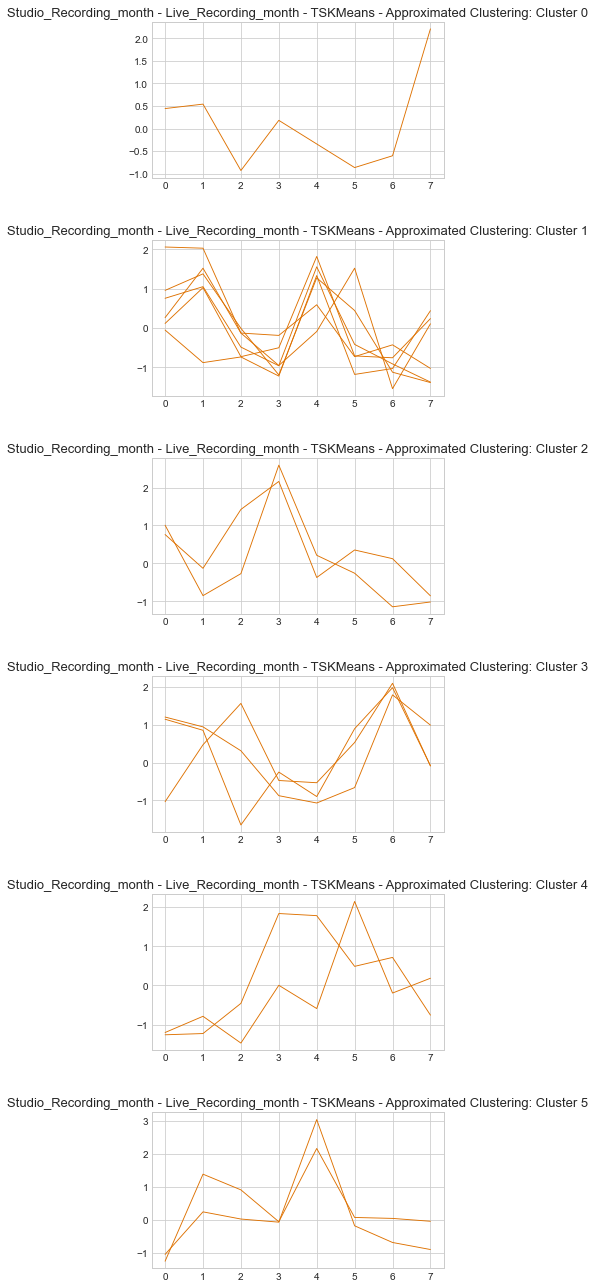

In [2043]:
analyze_clusters(labels_studio_live_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', True)

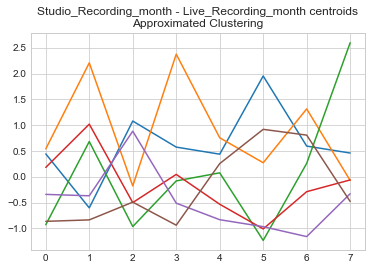

In [2044]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type)

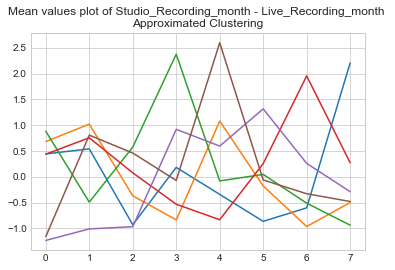

In [2045]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type)